In [46]:
import os
import re
import json
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

from melody import Melody
from utils import notes_to_midi, notes_and_chord_to_midi, get_chord_progressions

rcParams['figure.figsize'] = 200,100

In [2]:
import importlib
import objective_metrics


importlib.reload(objective_metrics)

<module 'objective_metrics' from '/media/manu/Data/PycharmProjects/thesis/src/objective_metrics.py'>

In [3]:
folder = f'../data/finalised'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.csv'))]

chord_progressions = get_chord_progressions('..')

In [4]:
metrics = {}

all_dfs = []

for filepath in filepaths:
    song_name = os.path.basename(filepath).replace('.csv', '')
    song_name = "".join(song_name.split(' - ')[-1])
    song_name = re.sub('\(.*\)', '', song_name).strip()
    song_name = re.sub('-[0-9][0-9]-', '', song_name)
    song_name = re.sub('-o-', '', song_name)
    
    print(filepath) 

    original = 'Real Book' in filepath

    df = pd.read_csv(filepath, index_col=0)
    
    df['filename'] = filepath
    df['song'] = song_name
    df['original'] = original
    
    all_dfs.append(df)

    pe1 = objective_metrics.compute_piece_pitch_entropy(df, 1)
    pe4 = objective_metrics.compute_piece_pitch_entropy(df, 4)
    gs = objective_metrics.compute_piece_groove_similarity(df, max_pairs=np.inf)
    qo = objective_metrics.calculate_QO(df)
    qd = objective_metrics.calculate_QD(df)
    cpr2 = objective_metrics.calculate_CPR(df, 2)
    dpr12 = objective_metrics.calculate_DPR(df, 12)
    ts8 = objective_metrics.calculate_TS(df, 8)
    pv4 = objective_metrics.calculate_PV(df, 4)
    rv4 = objective_metrics.calculate_RV(df, 4)
    hc = objective_metrics.calculate_HC(df)
        
    metrics[filepath] = {
        'H1': pe1,
        'H4': pe4,
        'GS': gs,
        'QO': qo,
        'QD': qd,
        'CPR2': cpr2,
        'DPR12': dpr12,
        'TS8': ts8,
        'PV4': pv4,
        'RV4': rv4,
        'HC': hc,
        'source': os.path.basename(os.path.dirname(filepath)),
        'original': original
    }
    

total_df = pd.concat(all_dfs)  

../data/finalised/csv/Real Book/'Round Midnight -o-.csv
../data/finalised/csv/Real Book/A Felicidade -o-.csv
../data/finalised/csv/Real Book/A Foggy Day -o-.csv
../data/finalised/csv/Real Book/A Night In Tunisia -o-.csv
../data/finalised/csv/Real Book/Accentuate The Positive -o-.csv
../data/finalised/csv/Real Book/After You've Gone -o-.csv
../data/finalised/csv/Real Book/Afternoon In Paris -o-.csv
../data/finalised/csv/Real Book/Ain't Misbehavin' -o-.csv
../data/finalised/csv/Real Book/Airegin -o-.csv
../data/finalised/csv/Real Book/All Of Me -o-.csv
../data/finalised/csv/Real Book/All The Things You Are -o-.csv
../data/finalised/csv/Real Book/Alone Together -o-.csv
../data/finalised/csv/Real Book/Ana Maria -o-.csv
../data/finalised/csv/Real Book/Anthropology -o-.csv
../data/finalised/csv/Real Book/Anything Goes -o-.csv
../data/finalised/csv/Real Book/Embraceable You -o-.csv
../data/finalised/csv/Real Book/Epistrophy -o-.csv
../data/finalised/csv/Real Book/Esp -o-.csv
../data/finalised

../data/finalised/csv/Real Book/Black Orpheus -o-.csv
../data/finalised/csv/Real Book/Blue Monk -o-.csv
../data/finalised/csv/Real Book/Blue Room -o-.csv
../data/finalised/csv/Real Book/Blues For Alice -o-.csv
../data/finalised/csv/Real Book/Boplicity -o-.csv
../data/finalised/csv/Real Book/But Beautiful -o-.csv
../data/finalised/csv/Real Book/Bye Bye Blackbird -o-.csv
../data/finalised/csv/Real Book/Christmas Song -o-.csv
../data/finalised/csv/Real Book/Come Rain Or Come Shine -o-.csv
../data/finalised/csv/Real Book/Come Sunday -o-.csv
../data/finalised/csv/Real Book/Cottontail -o-.csv
../data/finalised/csv/Real Book/Criss-Cross -o-.csv
../data/finalised/csv/Real Book/Cry Me A River -o-.csv
../data/finalised/csv/Real Book/Daahoud -o-.csv
../data/finalised/csv/Real Book/Dancing On The Ceiling -o-.csv
../data/finalised/csv/Real Book/Darn That Dream -o-.csv
../data/finalised/csv/Real Book/Days Of Wine And Roses -o-.csv
../data/finalised/csv/Real Book/Dearly Beloved -o-.csv
../data/finali

../data/finalised/csv/Weimar DB/John Coltrane - Oleo -2-.csv
../data/finalised/csv/Weimar DB/Lee Morgan - Blue Train -2-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Esp -3-.csv
../data/finalised/csv/Weimar DB/Milt Jackson - Bemsha Swing -3-.csv
../data/finalised/csv/Weimar DB/Paul Desmond - Alone Together -1-.csv
../data/finalised/csv/Weimar DB/Sidney Bechet - Limehouse Blues -1-.csv
../data/finalised/csv/Weimar DB/Steve Lacy - Ask Me Now -1-.csv
../data/finalised/csv/Weimar DB/Cannonball Adderley - Star Eyes -2-.csv
../data/finalised/csv/Weimar DB/Charlie Parker - Blues For Alice -1-.csv
../data/finalised/csv/Weimar DB/Charlie Parker - Blues For Alice -2-.csv
../data/finalised/csv/Weimar DB/Charlie Parker - Blues For Alice -3-.csv
../data/finalised/csv/Weimar DB/Charlie Parker - Don't Blame Me -1-.csv
../data/finalised/csv/Weimar DB/Charlie Parker - Donna Lee -1-.csv
../data/finalised/csv/Weimar DB/Charlie Parker - Donna Lee -2-.csv
../data/finalised/csv/Weimar DB/Charlie Parker

../data/finalised/csv/Weimar DB/Clifford Brown - Jordu -1-.csv
../data/finalised/csv/Weimar DB/Clifford Brown - Jordu -2-.csv
../data/finalised/csv/Weimar DB/Coleman Hawkins - Sophisticated Lady -1-.csv
../data/finalised/csv/Weimar DB/Curtis Fuller - Blue Train -1-.csv
../data/finalised/csv/Weimar DB/Curtis Fuller - Blue Train -2-.csv
../data/finalised/csv/Weimar DB/Curtis Fuller - Blue Train -3-.csv
../data/finalised/csv/Weimar DB/Curtis Fuller - Blue Train -4-.csv
../data/finalised/csv/Weimar DB/Curtis Fuller - Blue Train -5-.csv
../data/finalised/csv/Weimar DB/David Liebman - Softly As In A Morning Sunrise -1-.csv
../data/finalised/csv/Weimar DB/Chet Baker - Long Ago And Far Away -1-.csv
../data/finalised/csv/Weimar DB/Chet Baker - There Will Never Be Another You (1) -1-.csv
../data/finalised/csv/Weimar DB/Chet Baker - There Will Never Be Another You (2) -1-.csv
../data/finalised/csv/Weimar DB/Chris Potter - Anthropology -1-.csv
../data/finalised/csv/Weimar DB/Chris Potter - Anthrop

In [5]:
m = pd.DataFrame().from_dict(metrics).T
print(m.shape)
m.head(5)

(458, 13)


H1        H4  \
../data/finalised/csv/Real Book/'Round Midnight...  1.821058  2.824864   
../data/finalised/csv/Real Book/A Felicidade -o...  1.137322  2.196546   
../data/finalised/csv/Real Book/A Foggy Day -o-...   0.52206  1.873587   
../data/finalised/csv/Real Book/A Night In Tuni...  1.445085  2.688637   
../data/finalised/csv/Real Book/Accentuate The ...  1.511345  2.373354   

                                                          GS        QO  \
../data/finalised/csv/Real Book/'Round Midnight...   0.81964   0.78453   
../data/finalised/csv/Real Book/A Felicidade -o...  0.909224  0.674603   
../data/finalised/csv/Real Book/A Foggy Day -o-...  0.916793      0.64   
../data/finalised/csv/Real Book/A Night In Tuni...  0.871631  0.718519   
../data/finalised/csv/Real Book/Accentuate The ...  0.862189  0.655844   

                                                          QD      CPR2  \
../data/finalised/csv/Real Book/'Round Midnight...  0.961326  0.121795   
../data/finalised/csv/Real Book/A Felicidade -o...  0.896825  0.169811   
../data/finalised/csv/Real Book/A Foggy Day -o-...  0.933333  0.391304   
../data/finalised/csv/Real Book/A Night In Tuni...  0.933333  0.038462   
../data/finalised/csv/Real Book/Accentuate The ...  0.954545  0.092199   

                                                       DPR12       TS8  \
../data/finalised/csv/Real Book/'Round Midnight...  0.108974  0.027778   
../data/finalised/csv/Real Book/A Felicidade -o...  0.169811       0.0   
../data/finalised/csv/Real Book/A Foggy Day -o-...  0.391304  0.013514   
../data/finalised/csv/Real Book/A Night In Tuni...  0.030769  0.074349   
../data/finalised/csv/Real Book/Accentuate The ...   0.06383  0.006536   

                                                         PV4        RV4  \
../data/finalised/csv/Real Book/'Round Midnight...  8.793103  10.655172   
../data/finalised/csv/Real Book/A Felicidade -o...  5.311111   7.066667   
../data/finalised/csv/Real Book/A Foggy Day -o-...  4.206897   6.586207   
../data/finalised/csv/Real Book/A Night In Tuni...   7.47541   9.770492   
../data/finalised/csv/Real Book/Accentuate The ...  5.896552   9.724138   

                                                                                                   HC  \
../data/finalised/csv/Real Book/'Round Midnight...  [1.0, 1.0, 0.66, 1.0, 1.0, 1.0, 1.0, 1.0, 0.66...   
../data/finalised/csv/Real Book/A Felicidade -o...  [1.0, 1.0, 0.66, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
../data/finalised/csv/Real Book/A Foggy Day -o-...  [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.66, 1.0,...   
../data/finalised/csv/Real Book/A Night In Tuni...  [1.0, 1.0, 0.66, 0.66, 1.0, 0.66, 0.0, 1.0, 1....   
../data/finalised/csv/Real Book/Accentuate The ...  [1.0, 1.0, 0.0, 1.0, 0.33, 1.0, 1.0, 0.66, 1.0...   

                                                       source original  
../data/finalised/csv/Real Book/'Round Midnight...  Real Book     True  
../data/finalised/csv/Real Book/A Felicidade -o...  Real Book     True  
../data/finalised/csv/Real Book/A Foggy Day -o-...  Real Book     True  
../data/finalised/csv/Real Book/A Night In Tuni...  Real Book     True  
../data/finalised/csv/Real Book/Accentuate The ...  Real Book     True

In [6]:
pitch_classes = ['C','Db','D','Eb','E','F','F#','G', 'Ab', 'A', 'Bb', 'B']


total_df['pitch_class'] = (total_df['pitch'] % 12).apply([lambda x: pitch_classes[x]])

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


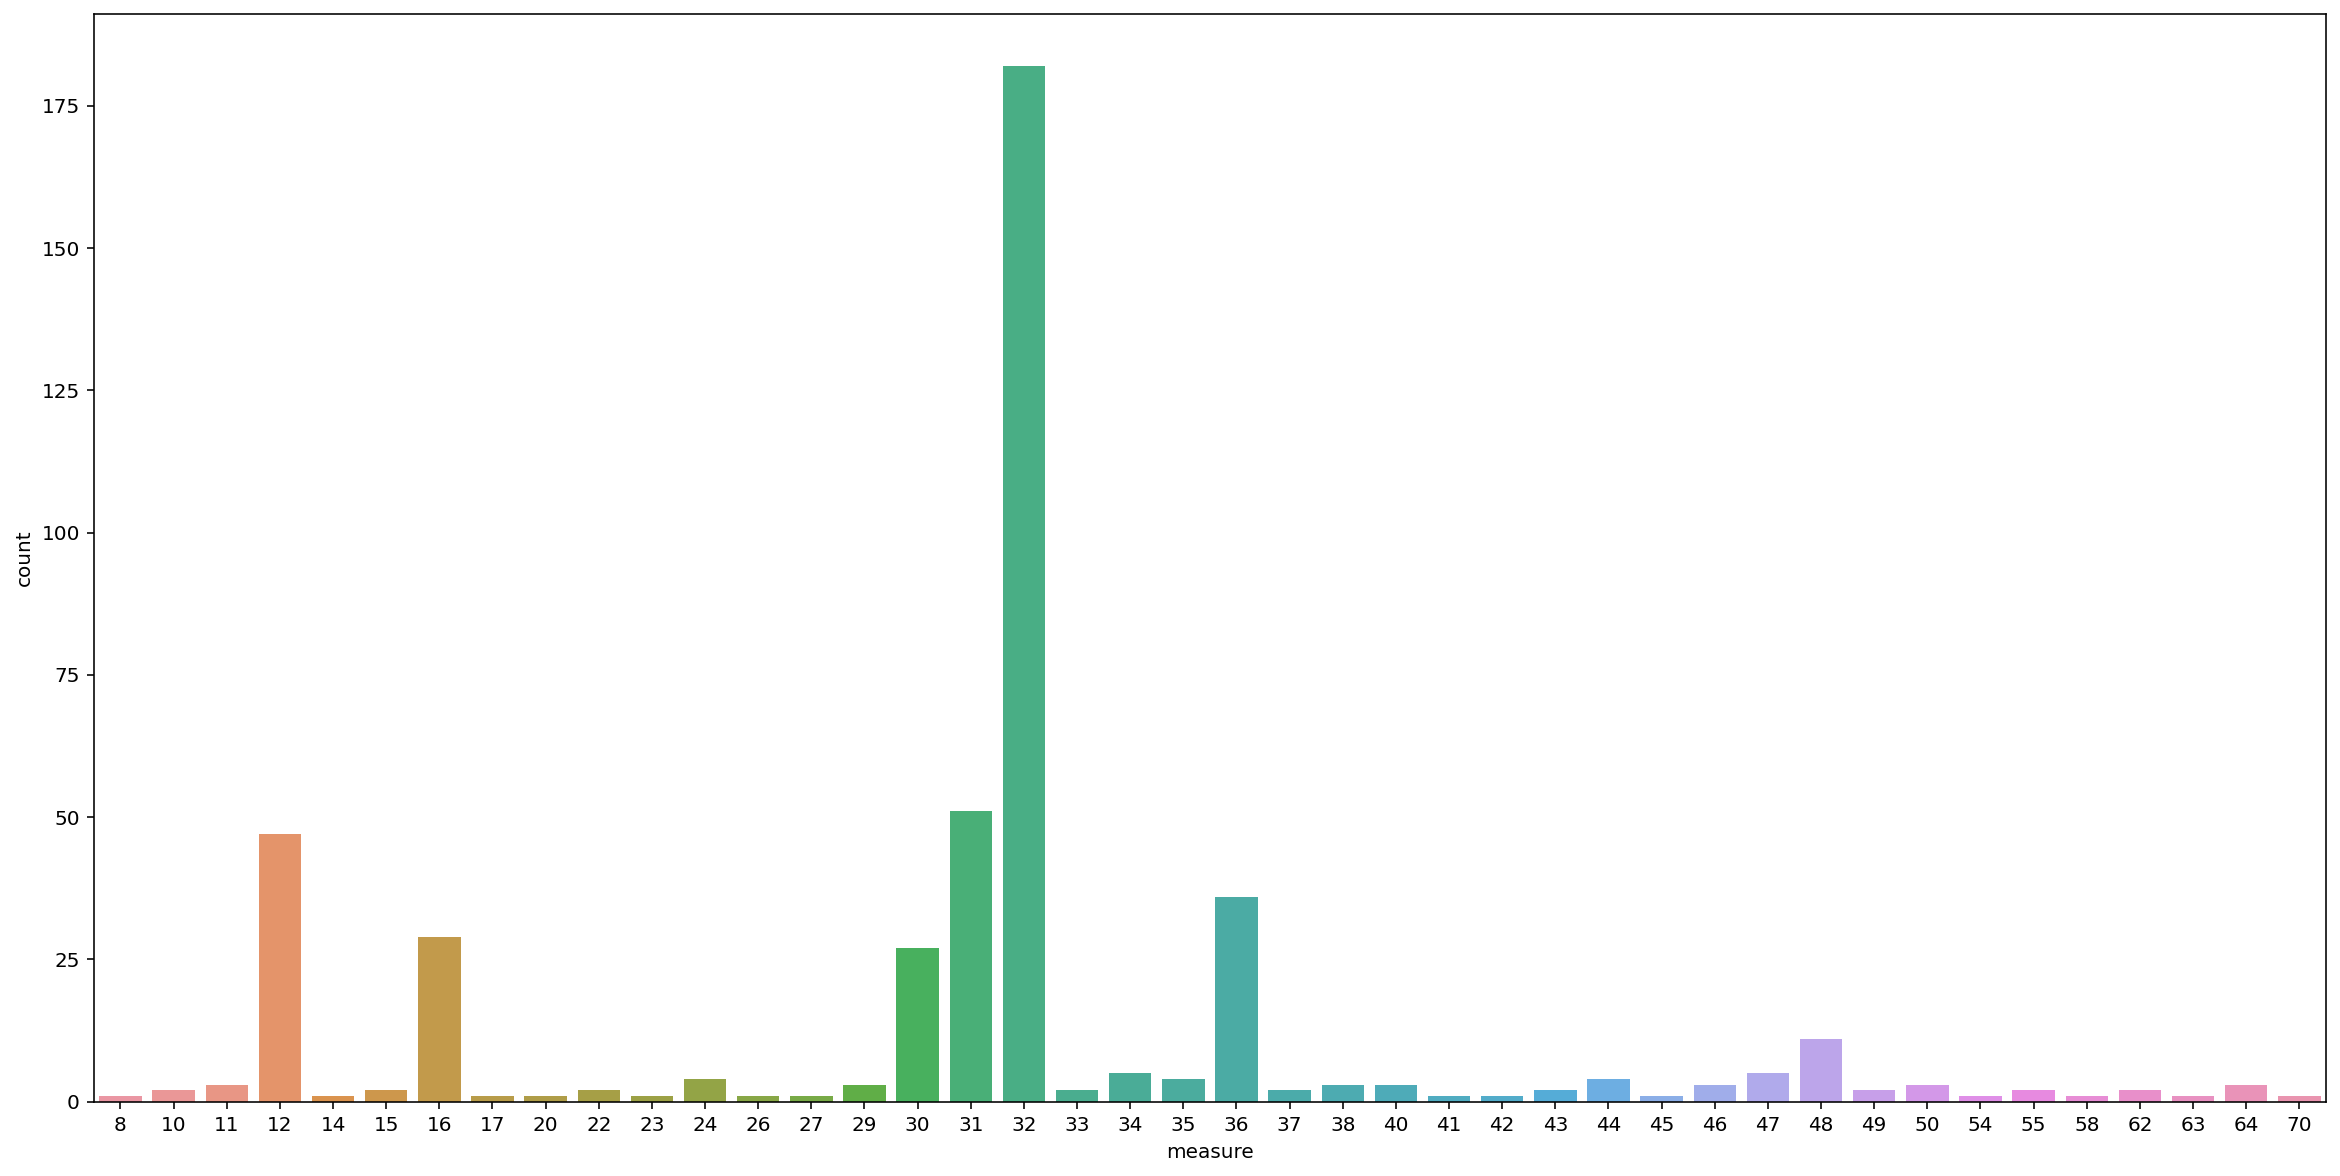

In [11]:
g = sns.countplot(total_df.groupby('filename')['measure'].apply(max) + 1)
# g.set_xticks(range(0,129,4))

In [7]:
total_df['source'] = total_df['filename'].apply([lambda x: os.path.basename(os.path.dirname(x))])

In [49]:
g = sns.histplot(
    data=total_df[total_df['duration'] <= 48], 
    x='duration', hue='source', stat="density", common_norm=False)
g.set_xticks(range(1,49))

In [50]:
g = sns.histplot(
    data=total_df, 
    x='offset', hue='source',
    stat="density", common_norm=False
)
g.set_xticks(range(0,49))

In [48]:
print(
    total_df[total_df['original'] == True]['pitch'].min(),
    total_df[total_df['original'] == True]['pitch'].max()
)

45 89


In [47]:
print(
    total_df[total_df['original'] == False]['pitch'].min(),
    total_df[total_df['original'] == False]['pitch'].max()
)

36 95


In [45]:
g = sns.histplot(data=total_df[(total_df['pitch']<109) & (total_df['pitch']>=36)], 
                 x='pitch', 
                 hue='source',
                 stat="density", common_norm=False
                )
g.set_xticks(range(36,109))
g.set_xticklabels(pitch_classes * 6 + ['C'])

[Text(36, 0, 'C'),
 Text(37, 0, 'Db'),
 Text(38, 0, 'D'),
 Text(39, 0, 'Eb'),
 Text(40, 0, 'E'),
 Text(41, 0, 'F'),
 Text(42, 0, 'F#'),
 Text(43, 0, 'G'),
 Text(44, 0, 'Ab'),
 Text(45, 0, 'A'),
 Text(46, 0, 'Bb'),
 Text(47, 0, 'B'),
 Text(48, 0, 'C'),
 Text(49, 0, 'Db'),
 Text(50, 0, 'D'),
 Text(51, 0, 'Eb'),
 Text(52, 0, 'E'),
 Text(53, 0, 'F'),
 Text(54, 0, 'F#'),
 Text(55, 0, 'G'),
 Text(56, 0, 'Ab'),
 Text(57, 0, 'A'),
 Text(58, 0, 'Bb'),
 Text(59, 0, 'B'),
 Text(60, 0, 'C'),
 Text(61, 0, 'Db'),
 Text(62, 0, 'D'),
 Text(63, 0, 'Eb'),
 Text(64, 0, 'E'),
 Text(65, 0, 'F'),
 Text(66, 0, 'F#'),
 Text(67, 0, 'G'),
 Text(68, 0, 'Ab'),
 Text(69, 0, 'A'),
 Text(70, 0, 'Bb'),
 Text(71, 0, 'B'),
 Text(72, 0, 'C'),
 Text(73, 0, 'Db'),
 Text(74, 0, 'D'),
 Text(75, 0, 'Eb'),
 Text(76, 0, 'E'),
 Text(77, 0, 'F'),
 Text(78, 0, 'F#'),
 Text(79, 0, 'G'),
 Text(80, 0, 'Ab'),
 Text(81, 0, 'A'),
 Text(82, 0, 'Bb'),
 Text(83, 0, 'B'),
 Text(84, 0, 'C'),
 Text(85, 0, 'Db'),
 Text(86, 0, 'D'),
 Text(87, 

In [44]:
g = sns.histplot(data=total_df, 
    x='pitch_class', hue='source', 
    stat="density", common_norm=False
)

In [42]:
total_df = total_df.merge(pd.DataFrame(total_df.groupby('filename').size()), how='left', left_on='filename', right_on='filename')
total_df = total_df.rename(columns={0: 'n_notes'})
print(
    total_df['n_notes'].min(),
    total_df['n_notes'].max(),
)

40 860


In [43]:
sns.histplot(data=total_df, x='n_notes', hue='source')

<AxesSubplot:xlabel='n_notes', ylabel='Count'>

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='filename', ylabel='count'>

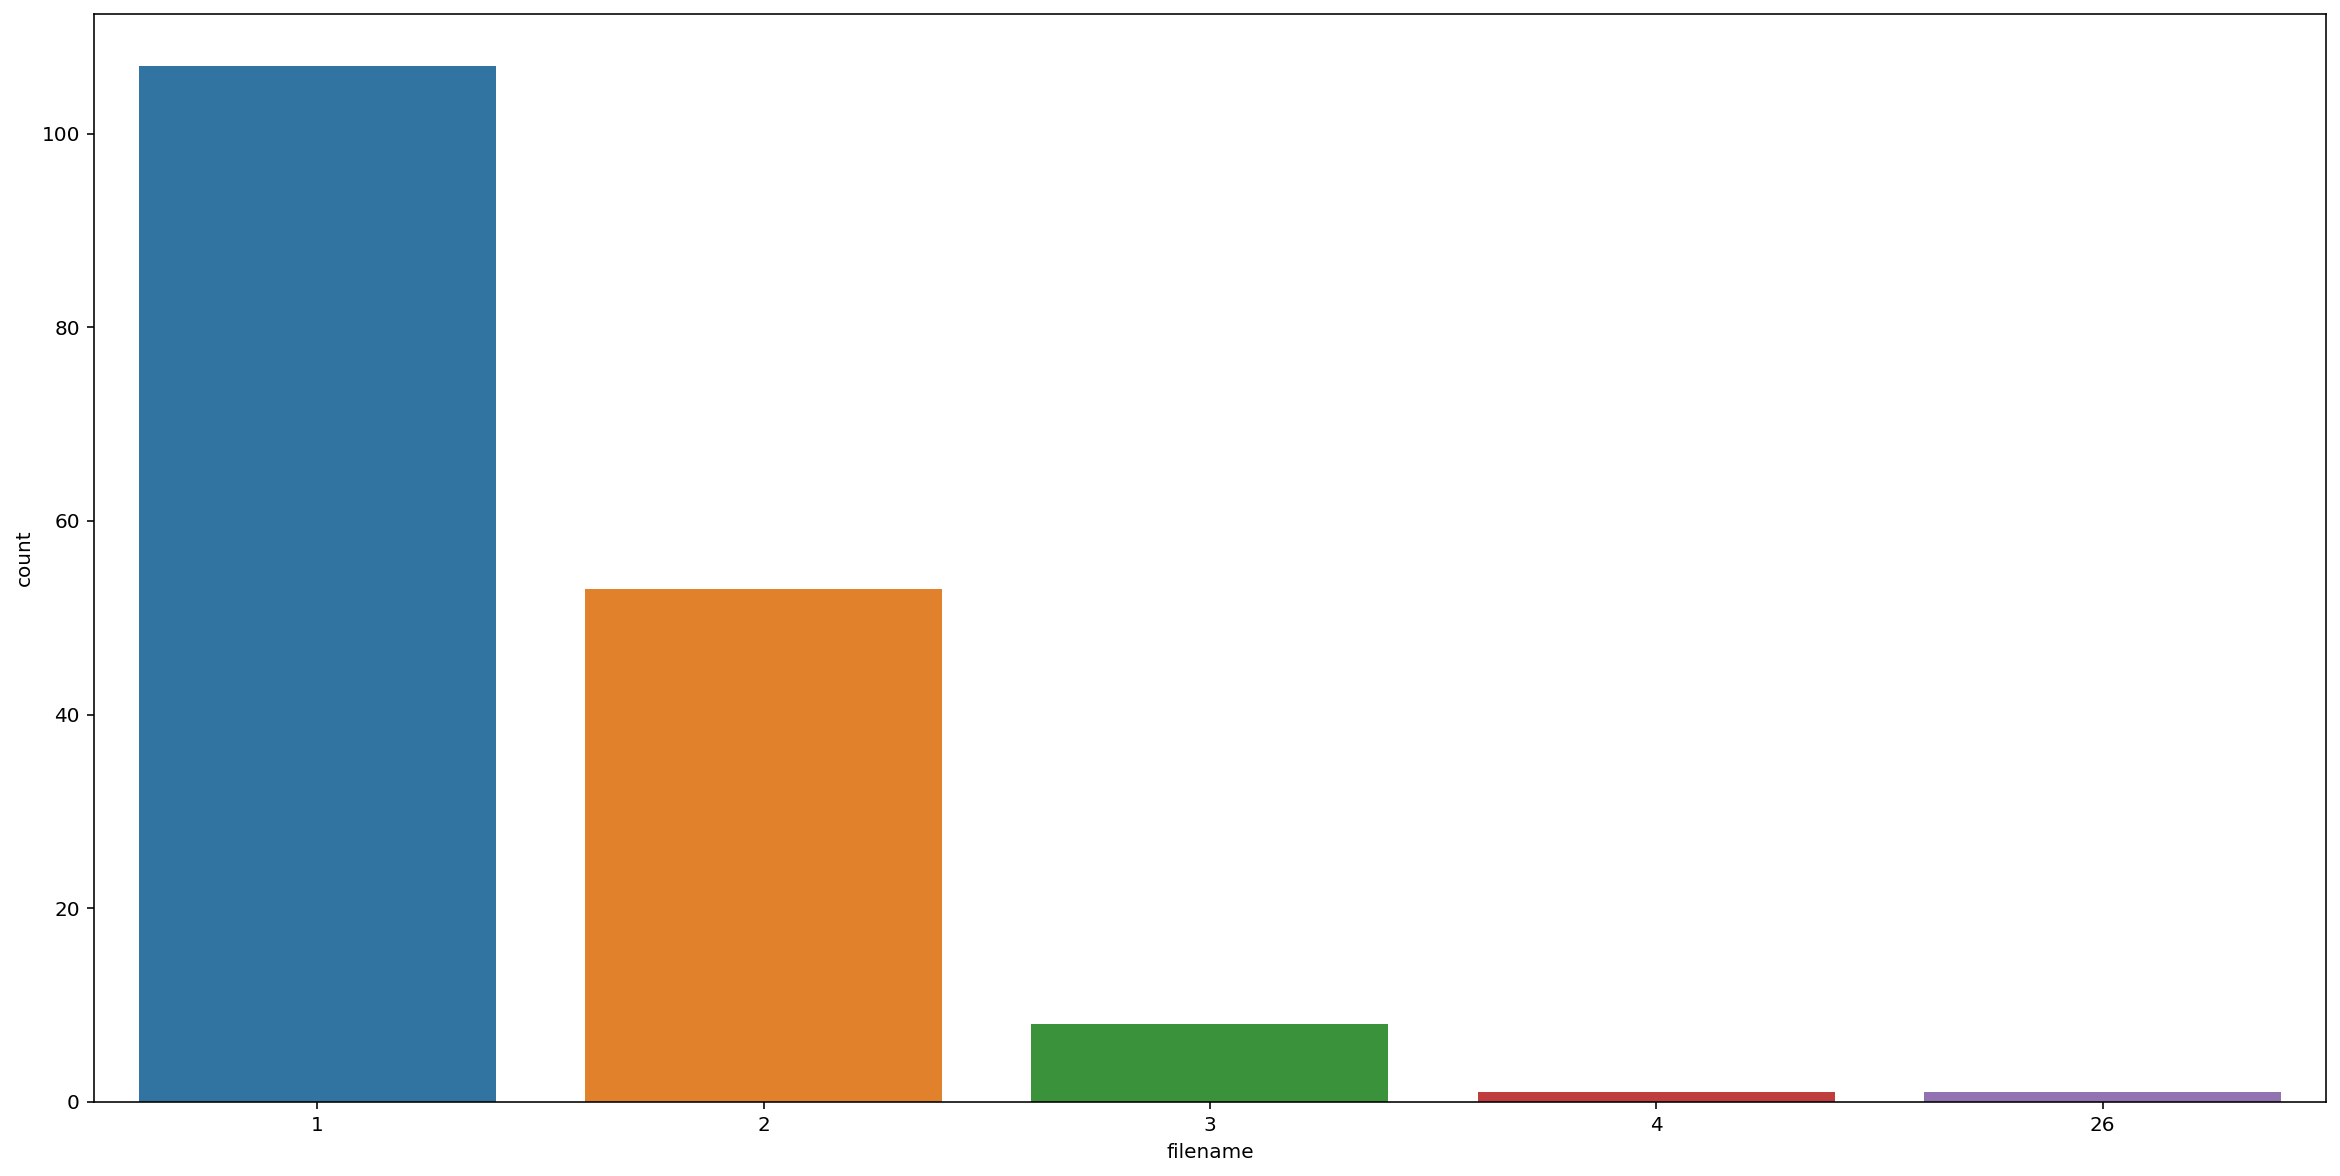

In [13]:
sns.countplot(total_df[total_df['original'] == False].groupby('song')['filename'].unique().apply(len))

In [14]:
total_df.head(5)

pitch pitch_class       time  raw_ticks  quant_ticks  raw_duration  \
0     58          Bb   8.615385   0.270833         13.0      0.062500   
1     63          Eb   8.930770   0.341667         16.0      0.077083   
2     65           F   9.107693   0.400000         19.0      0.066667   
3     70          Bb   9.361539   0.462500         22.0      0.072917   
4     66          F#  10.715386   0.537500         26.0      0.364583   

   quant_duration  offset  measure  ticks  duration chord_name  \
0               3      13        0   13.0         3     Ebmin7   
1               4      16        0   16.0         4     Ebmin7   
2               3      19        0   19.0         3     Ebmin7   
3               4      22        0   22.0         4     Ebmin7   
4              18      26        0   26.0        18  Ebmin7/Db   

                                            filename              song  \
0  ../data/finalised/csv/Real Book/'Round Midnigh...  'Round Midnight    
1  ../data/finalised/csv/Real Book/'Round Midnigh...  'Round Midnight    
2  ../data/finalised/csv/Real Book/'Round Midnigh...  'Round Midnight    
3  ../data/finalised/csv/Real Book/'Round Midnigh...  'Round Midnight    
4  ../data/finalised/csv/Real Book/'Round Midnigh...  'Round Midnight    

   original  Unnamed: 0.1     source  
0      True           NaN  Real Book  
1      True           NaN  Real Book  
2      True           NaN  Real Book  
3      True           NaN  Real Book  
4      True           NaN  Real Book

In [15]:
import ast
import music21
from ezchord import Chord
import mingus.core.notes as notes

context  = music21.key.Key('C')

total_df['chord_notes'] = total_df['chord_name'].apply([lambda x: [notes.int_to_note(y % 12, 'b') for y in Chord(x).getMIDI()]])
total_df['chord_root'] =  total_df['chord_notes'].apply([lambda x: x[0]])
total_df['chord_notes_triads'] = total_df['chord_notes'].apply([lambda x: x[1:4]])

<AxesSubplot:xlabel='chord_root', ylabel='count'>

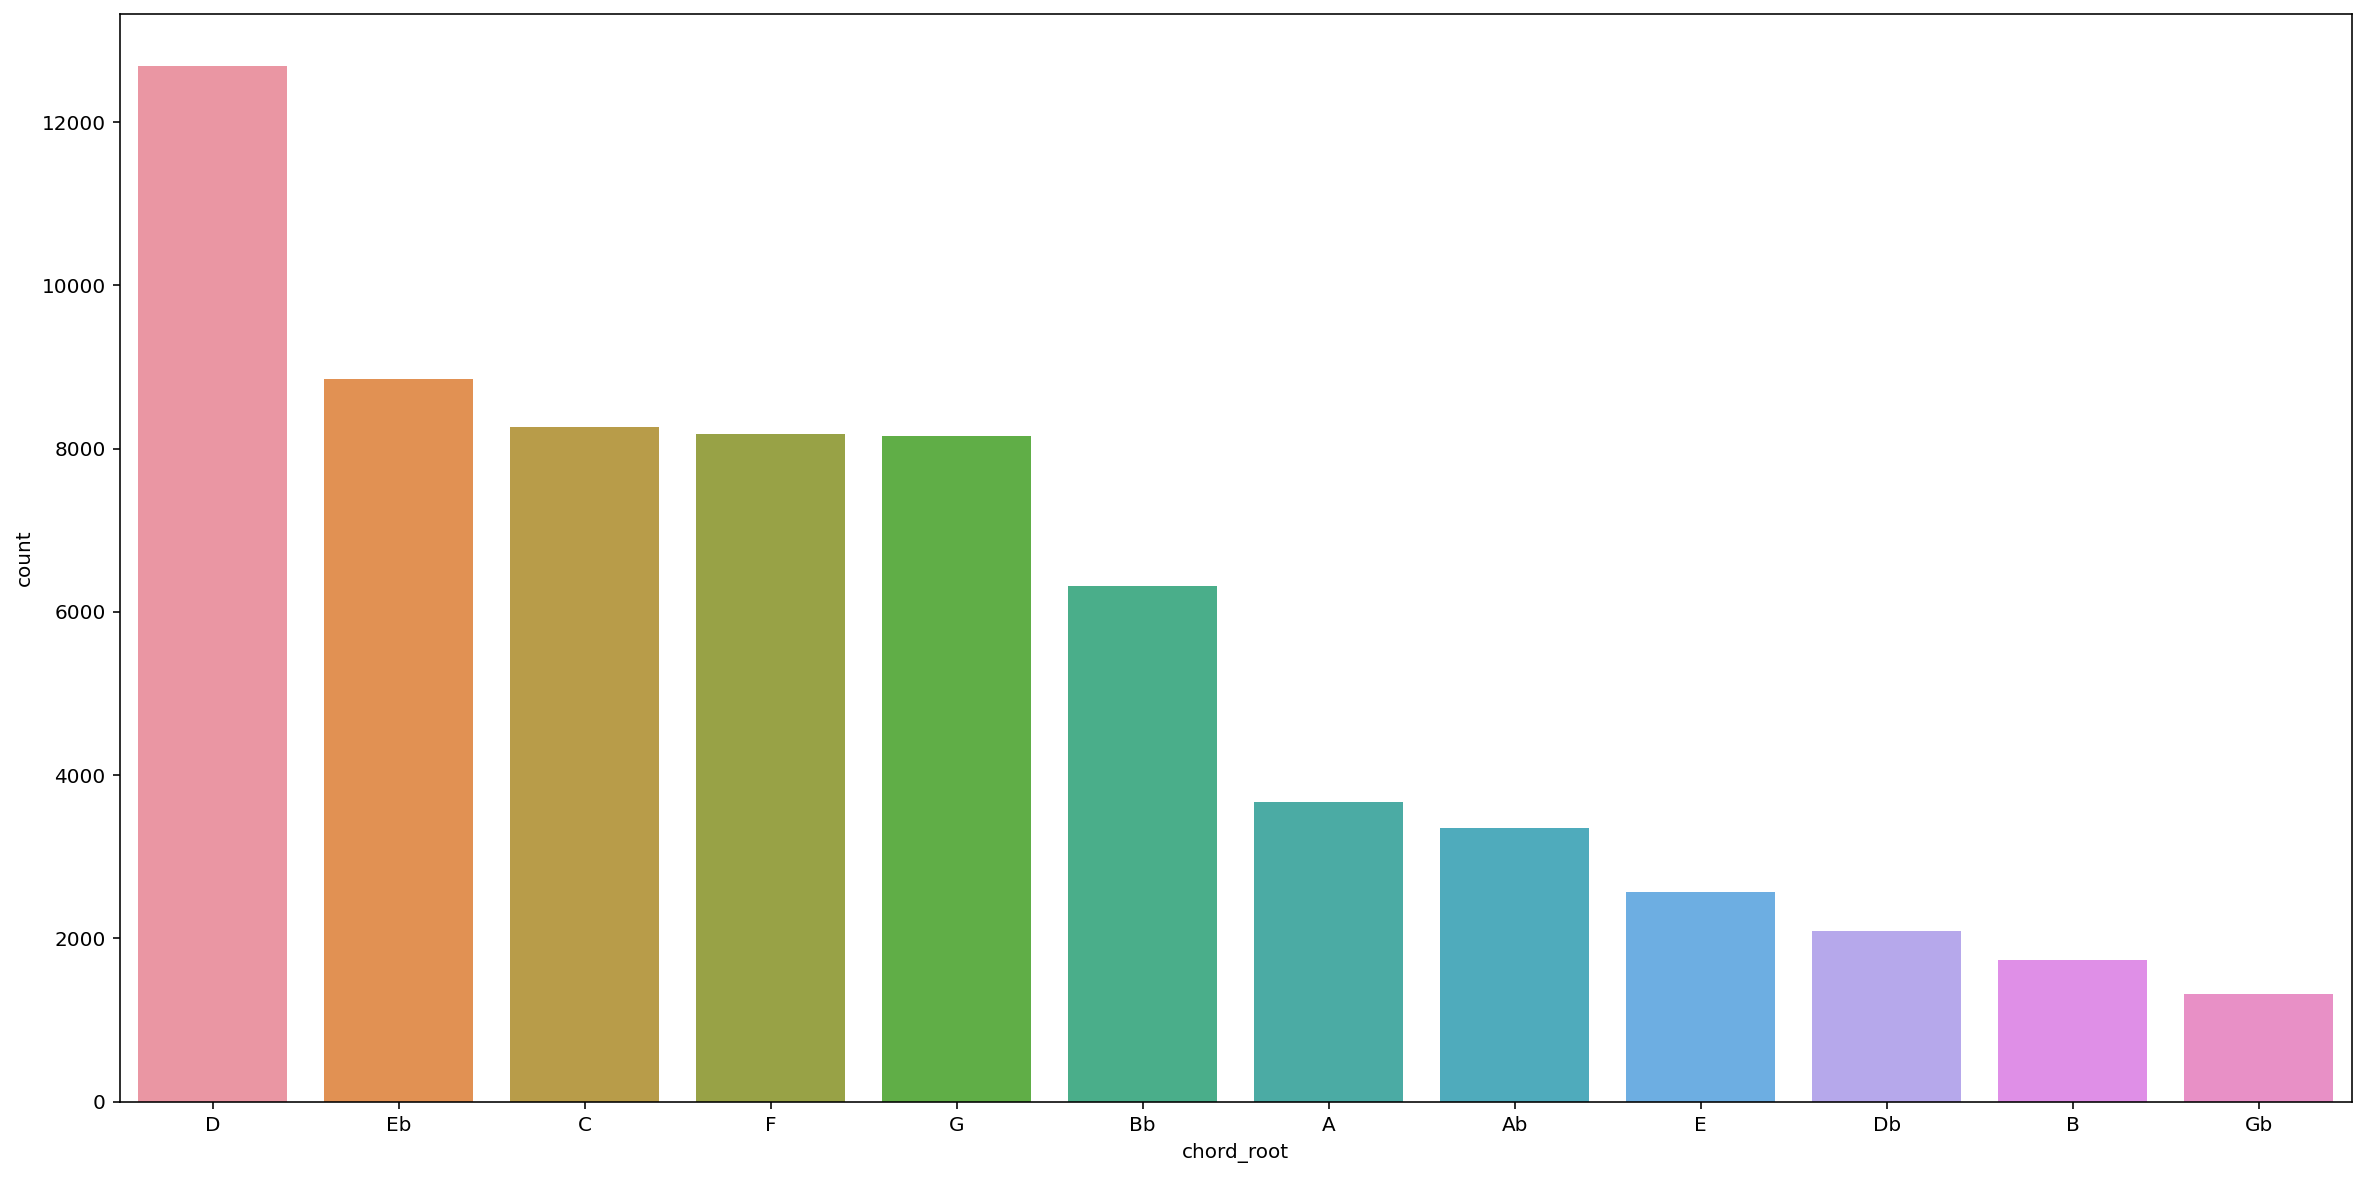

In [16]:
sns.countplot(data=total_df, x='chord_root', order=total_df['chord_root'].value_counts().index)

In [17]:
chord_map = {}

for uc in total_df['chord_notes_triads'].drop_duplicates():
    suc = str(uc)
    chord_map[suc] = music21.chord.Chord(uc).simplifyEnharmonics(keyContext=context).pitchedCommonName

In [18]:
total_df['chord_notes_triad_names'] = total_df['chord_notes_triads'].apply([lambda x: chord_map[str(x)]])
total_df['chord_notes_triad_names'] = total_df['chord_notes_triad_names'].str.replace('triad', '').str.replace('-', ' ')

<AxesSubplot:xlabel='chord_notes_triad_names', ylabel='count'>

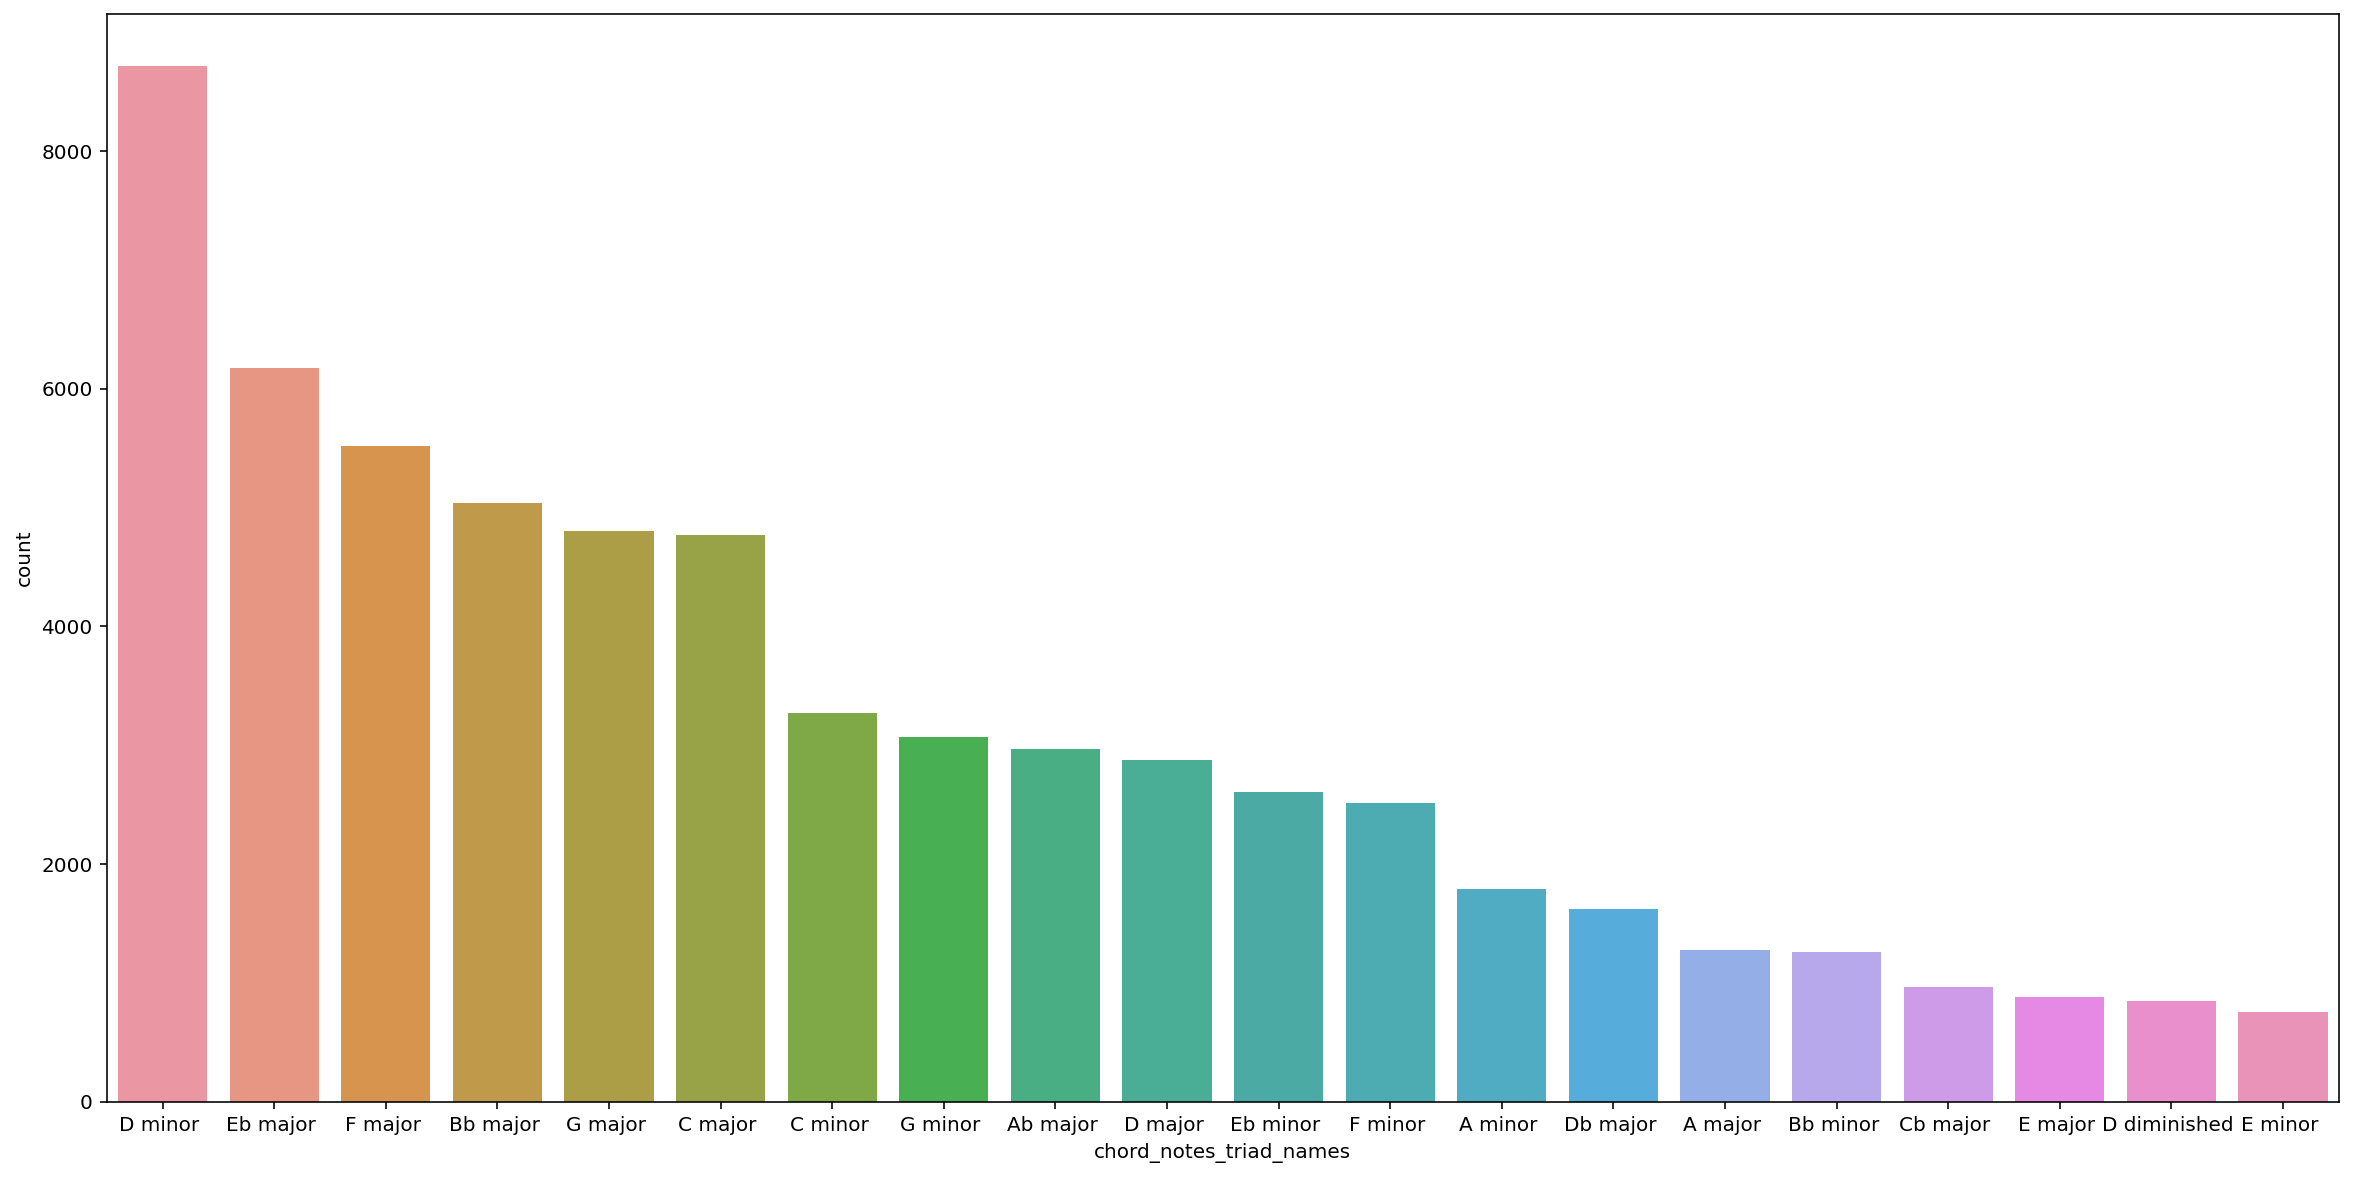

In [19]:
sns.countplot(data=total_df, x='chord_notes_triad_names', order=total_df['chord_notes_triad_names'].value_counts().iloc[:20].index)

In [20]:
folder = '../data/finalised'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [21]:
stats = {}

for filepath in filepaths:
    melody = Melody(filepath, 'v1.2', '..')
    melody.setup()
    melody.set_song_structure(chord_progressions[melody.song_name])
    
    key = music21.key.Key(melody.chord_progression_key, "minor" if melody.chord_progression_minor else 'minor')
    
    stats[melody.filepath] = {
        'key': key
    }
    

['Sign', 'A', 'N1', 'Sign', 'A', 'N2', 'B', 'Sign', 'A', 'N2']
['A', 'B', 'C', 'D']
['A', 'B', 'A2', 'C']
['A', 'A', 'B', 'A2', 'A', 'A', 'B', 'A2']
['A', 'A', 'B', 'A2']
['A', 'B', 'A2', 'C']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'B', 'A2', 'C']
['A', 'B', 'A2', 'C']
['A', 'B', 'C', 'D']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'B', 'C']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'C']
['A', 'B', 'A2', 'C']
['A', 'B', 'C', 'B2']
['A', 'N1', 'A', 'N2']
['A', 'A', 'B', 'A']
['A', 'B', 'ToCod', 'A', 'B']
['A', 'B']
['A', 'B']
['A', 'B', 'A2', 'C']
['A']
['A', 'N1', 'A', 'N2']
['A']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'B']
['A', 'A', 'B', 'A2']
['A', 'A2', 'B', 'C']
['A', 'A', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'B', 'A2', 'C']
['A', 'B']
['A', 'N1', 'A', 'N2', 'B', 'A', 'N3']
['A', 'B', 'A']
['

['A1', 'N1', 'A1', 'N2', 'B1', 'A1', 'N2']
['A1', 'N1', 'A1', 'N2', 'B1', 'A1', 'N2']
['A', 'A2', 'B', 'A3']
['A', 'A2', 'B', 'A3']
['A', 'B', 'C', 'D']
['A']
['A']
['A']
['A']
['A']
['A']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'B']
['A', 'B']
['A', 'A', 'B', 'A2']
['A', 'B', 'A2', 'C']
['A', 'A', 'B', 'A2']
['A', 'B']
['A', 'B', 'A2', 'C']
['A', 'B', 'A2', 'C']
['A', 'B', 'A2', 'C']
['A', 'B', 'A2', 'C']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'N1', 'A', 'N2', 'B', 'A2']
['A', 'A', 'B', 'A2', 'A', 'A', 'B', 'A2']
['A', 'A', 'B', 'A2', 'A', 'A', 'B', 'A2']
['A', 'A', 'B', 'A2']
['A', 'A', 'B', 'A2']
['A', 'B', 'A']
['A', 'B', 'A']
['A', 'B', 'A']
['A', 'B

In [22]:
s = pd.DataFrame().from_dict(stats).T
s

key
../data/finalised/midi/Real Book/'Round Midnigh...  e- minor
../data/finalised/midi/Real Book/A Felicidade -...   a minor
../data/finalised/midi/Real Book/A Foggy Day -o...   f minor
../data/finalised/midi/Real Book/A Night In Tun...   d minor
../data/finalised/midi/Real Book/Accentuate The...   f minor
...                                                      ...
../data/finalised/midi/Weimar DB/Wynton Marsali...   c minor
../data/finalised/midi/Weimar DB/Zoot Sims - Al...  a- minor
../data/finalised/midi/Weimar DB/Zoot Sims - Ni...   c minor
../data/finalised/midi/Weimar DB/Zoot Sims - Ni...   c minor
../data/finalised/midi/Weimar DB/Zoot Sims - Ni...   c minor

[458 rows x 1 columns]

In [23]:
s['key_root'] = s['key'].apply(lambda x: x.tonic)
s['key_mode'] = s['key'].apply(lambda x: x.mode)
s['key_name'] = s['key'].apply(lambda x: x.name.replace('-', 'b'))

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='key_name', ylabel='count'>

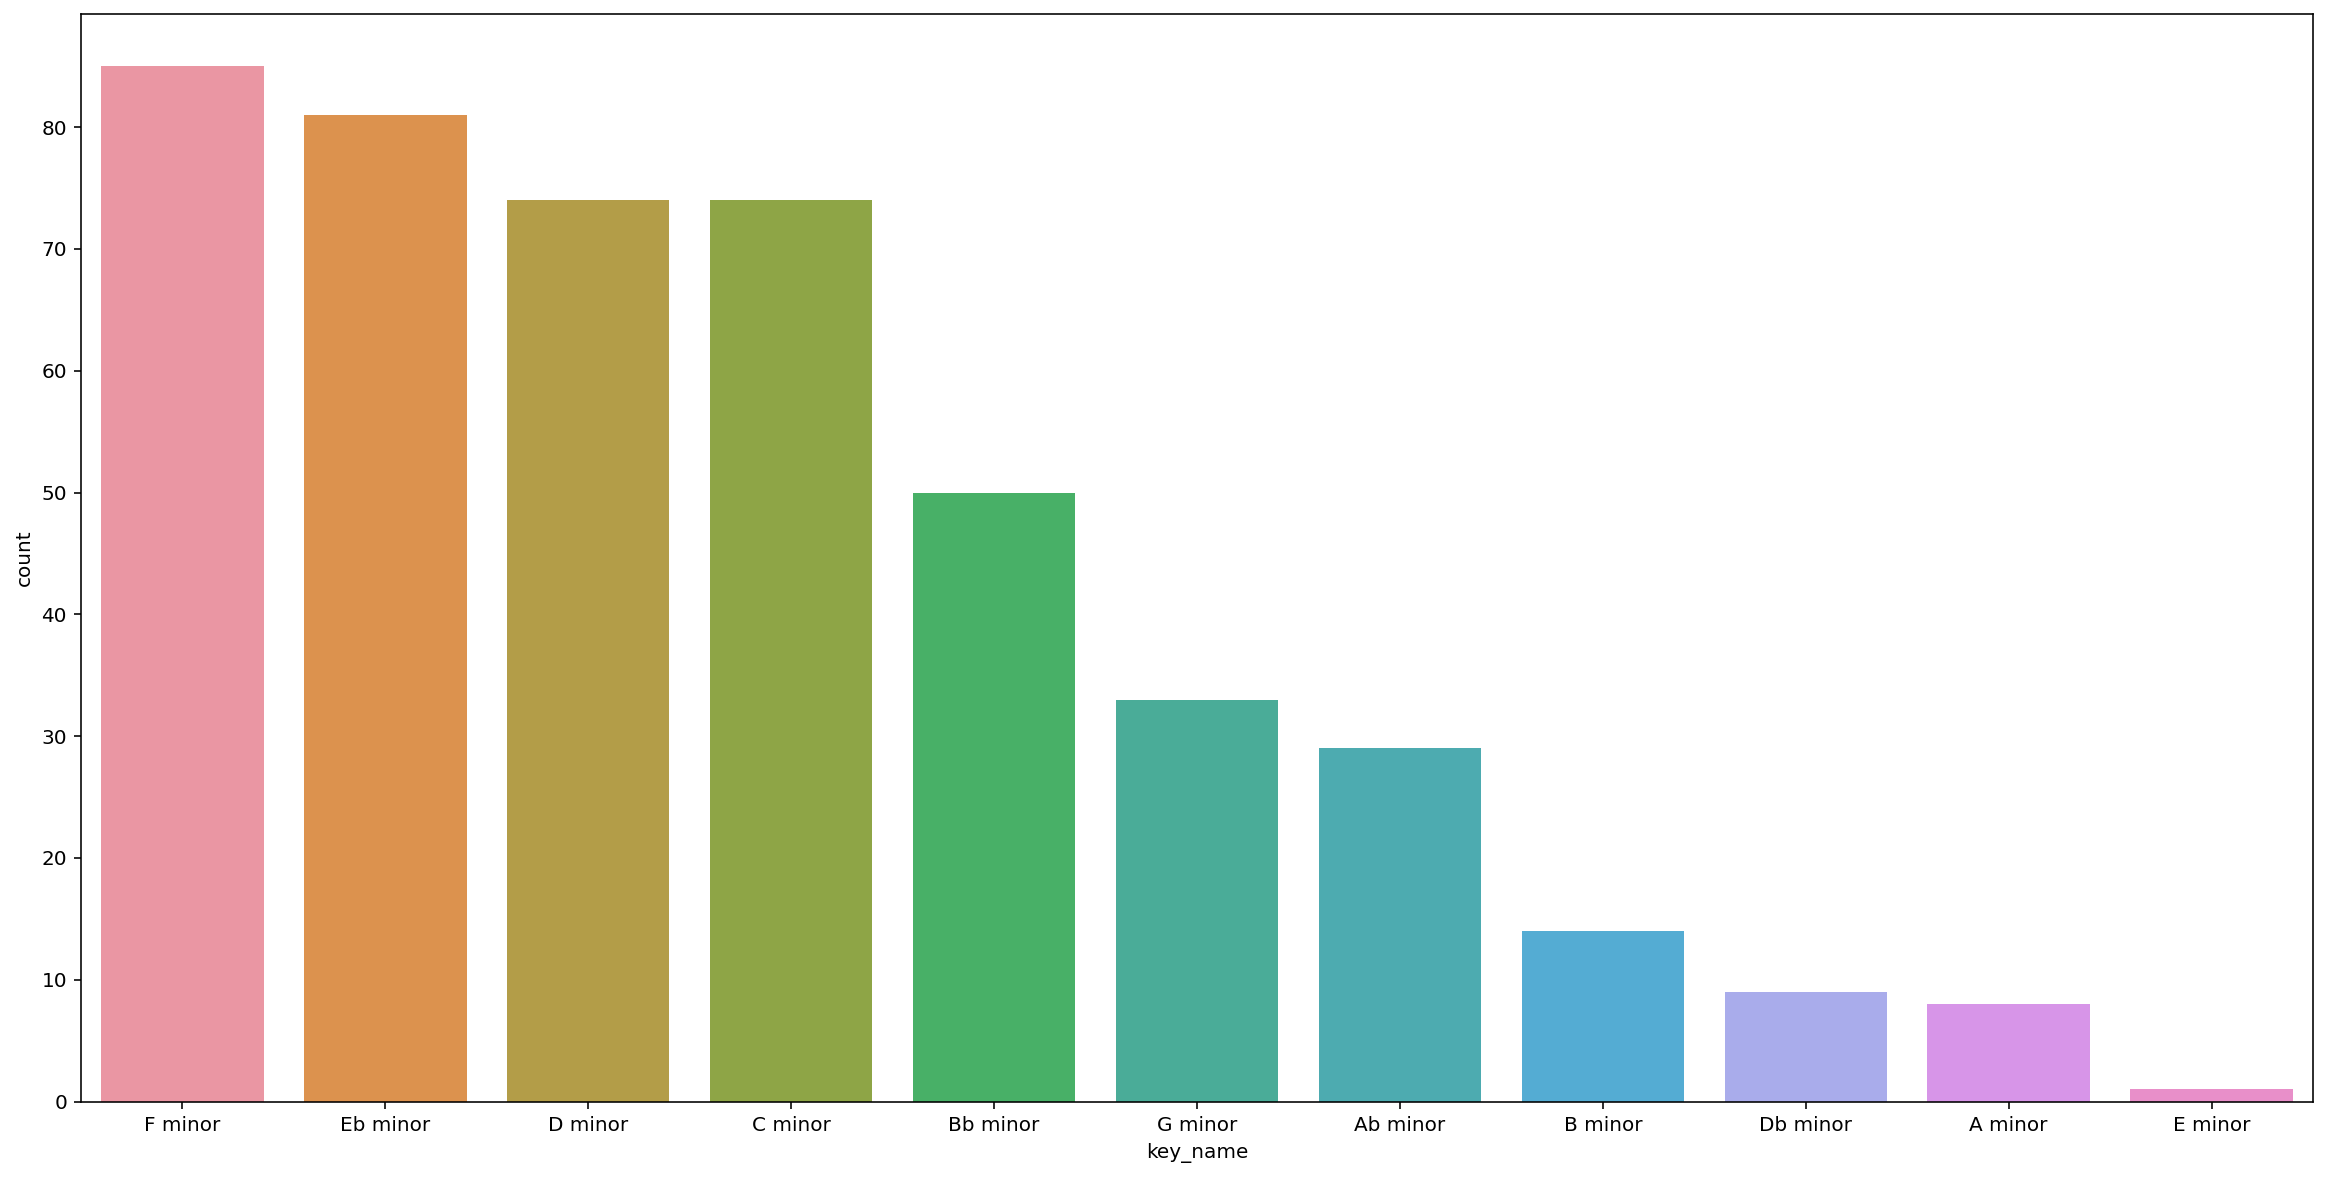

In [24]:
sns.countplot(s['key_name'], order=s['key_name'].value_counts().index)

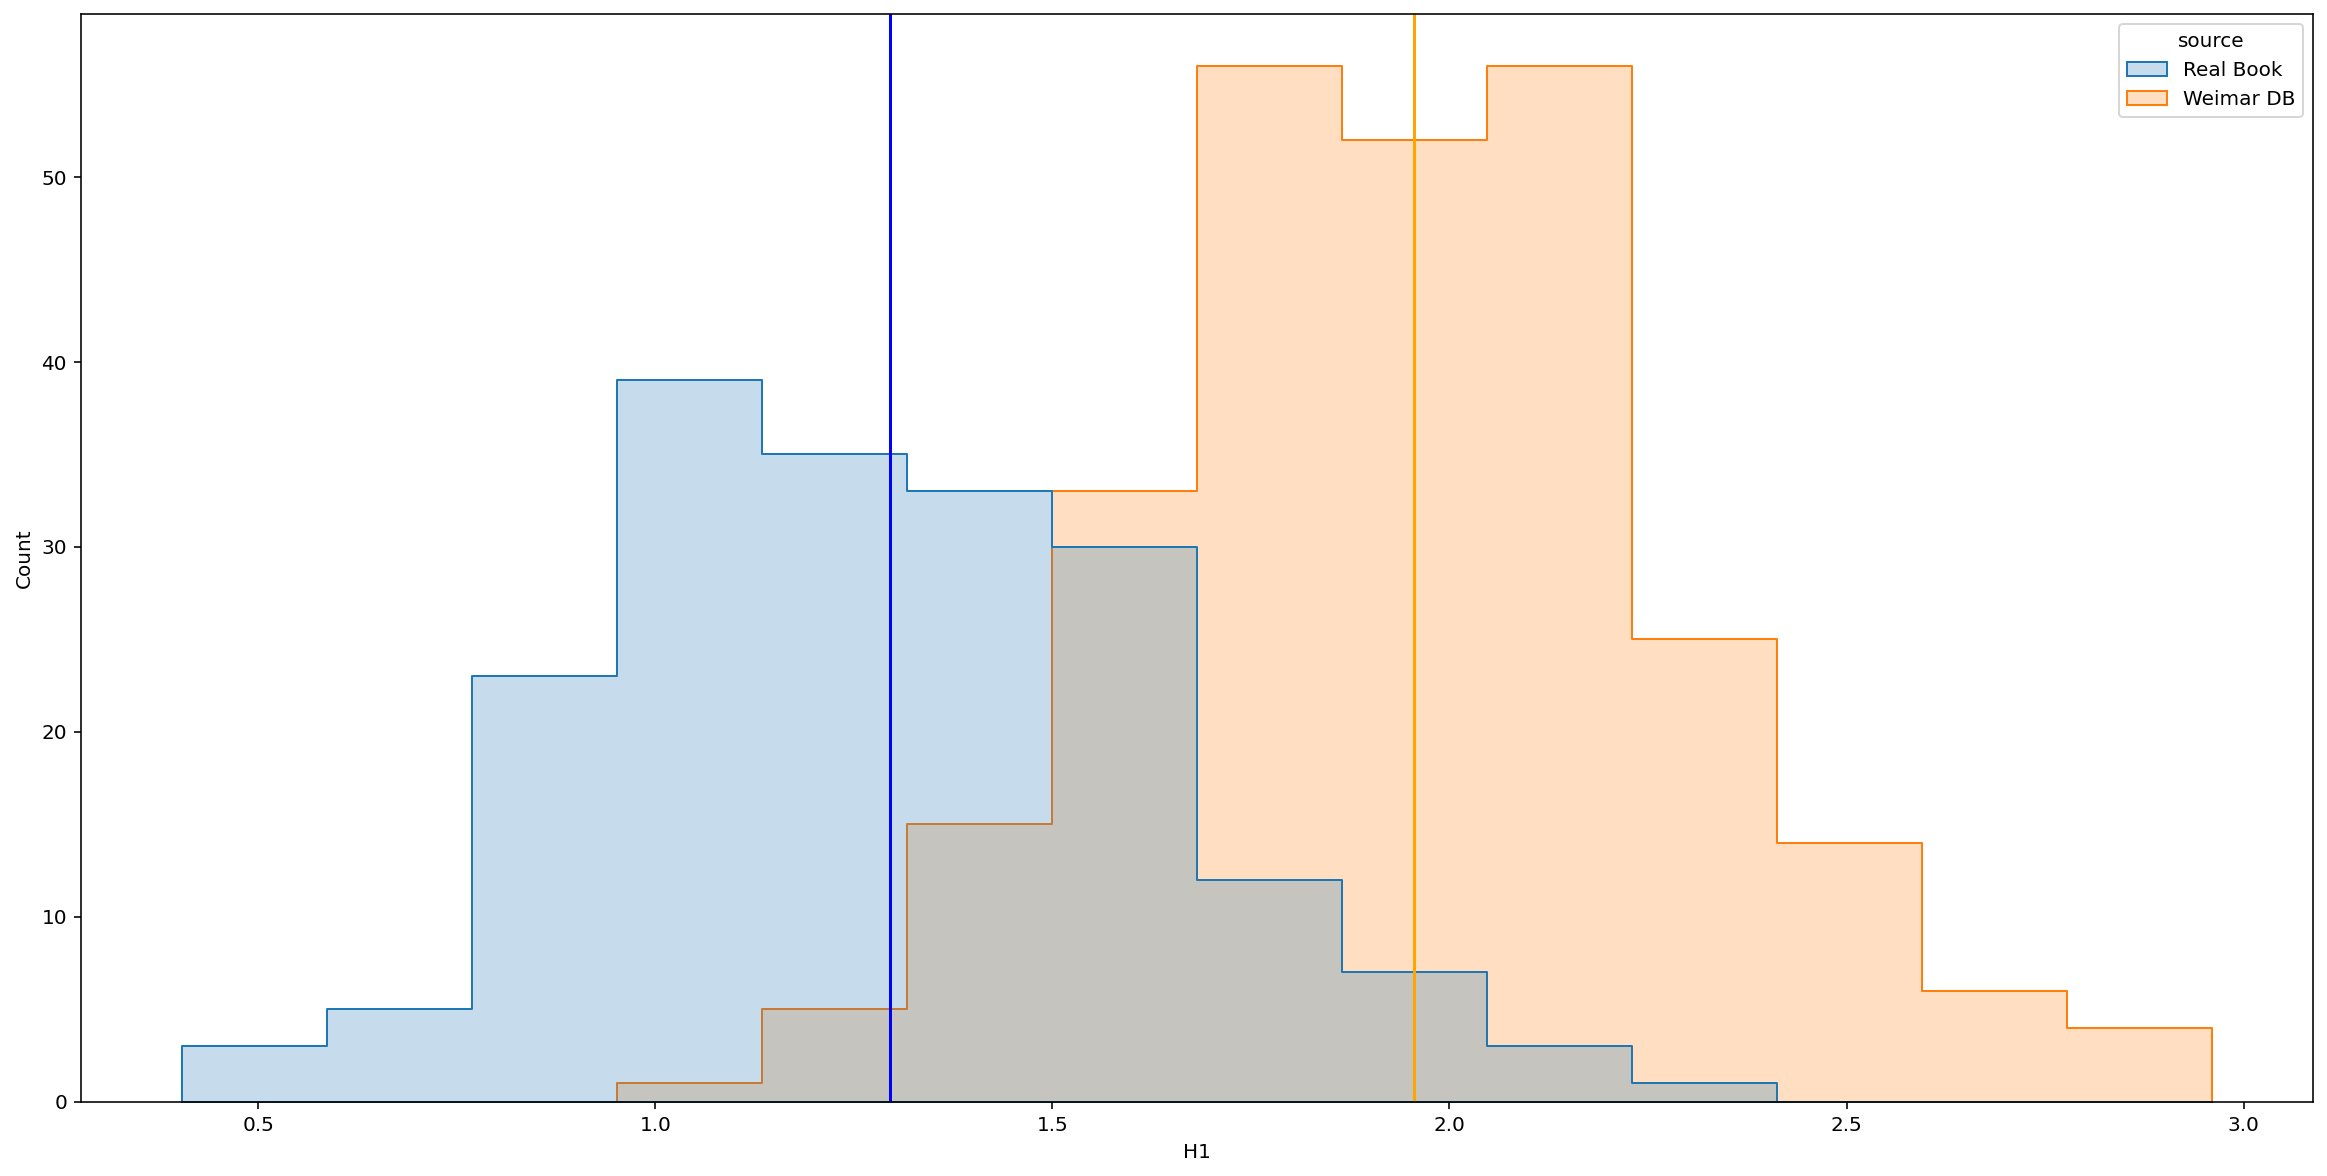

In [25]:
sns.histplot(data=m, x='H1', hue='source', element="step")
plt.axvline(x=m[m.source == 'Weimar DB'].H1.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].H1.mean(),
            color='blue')

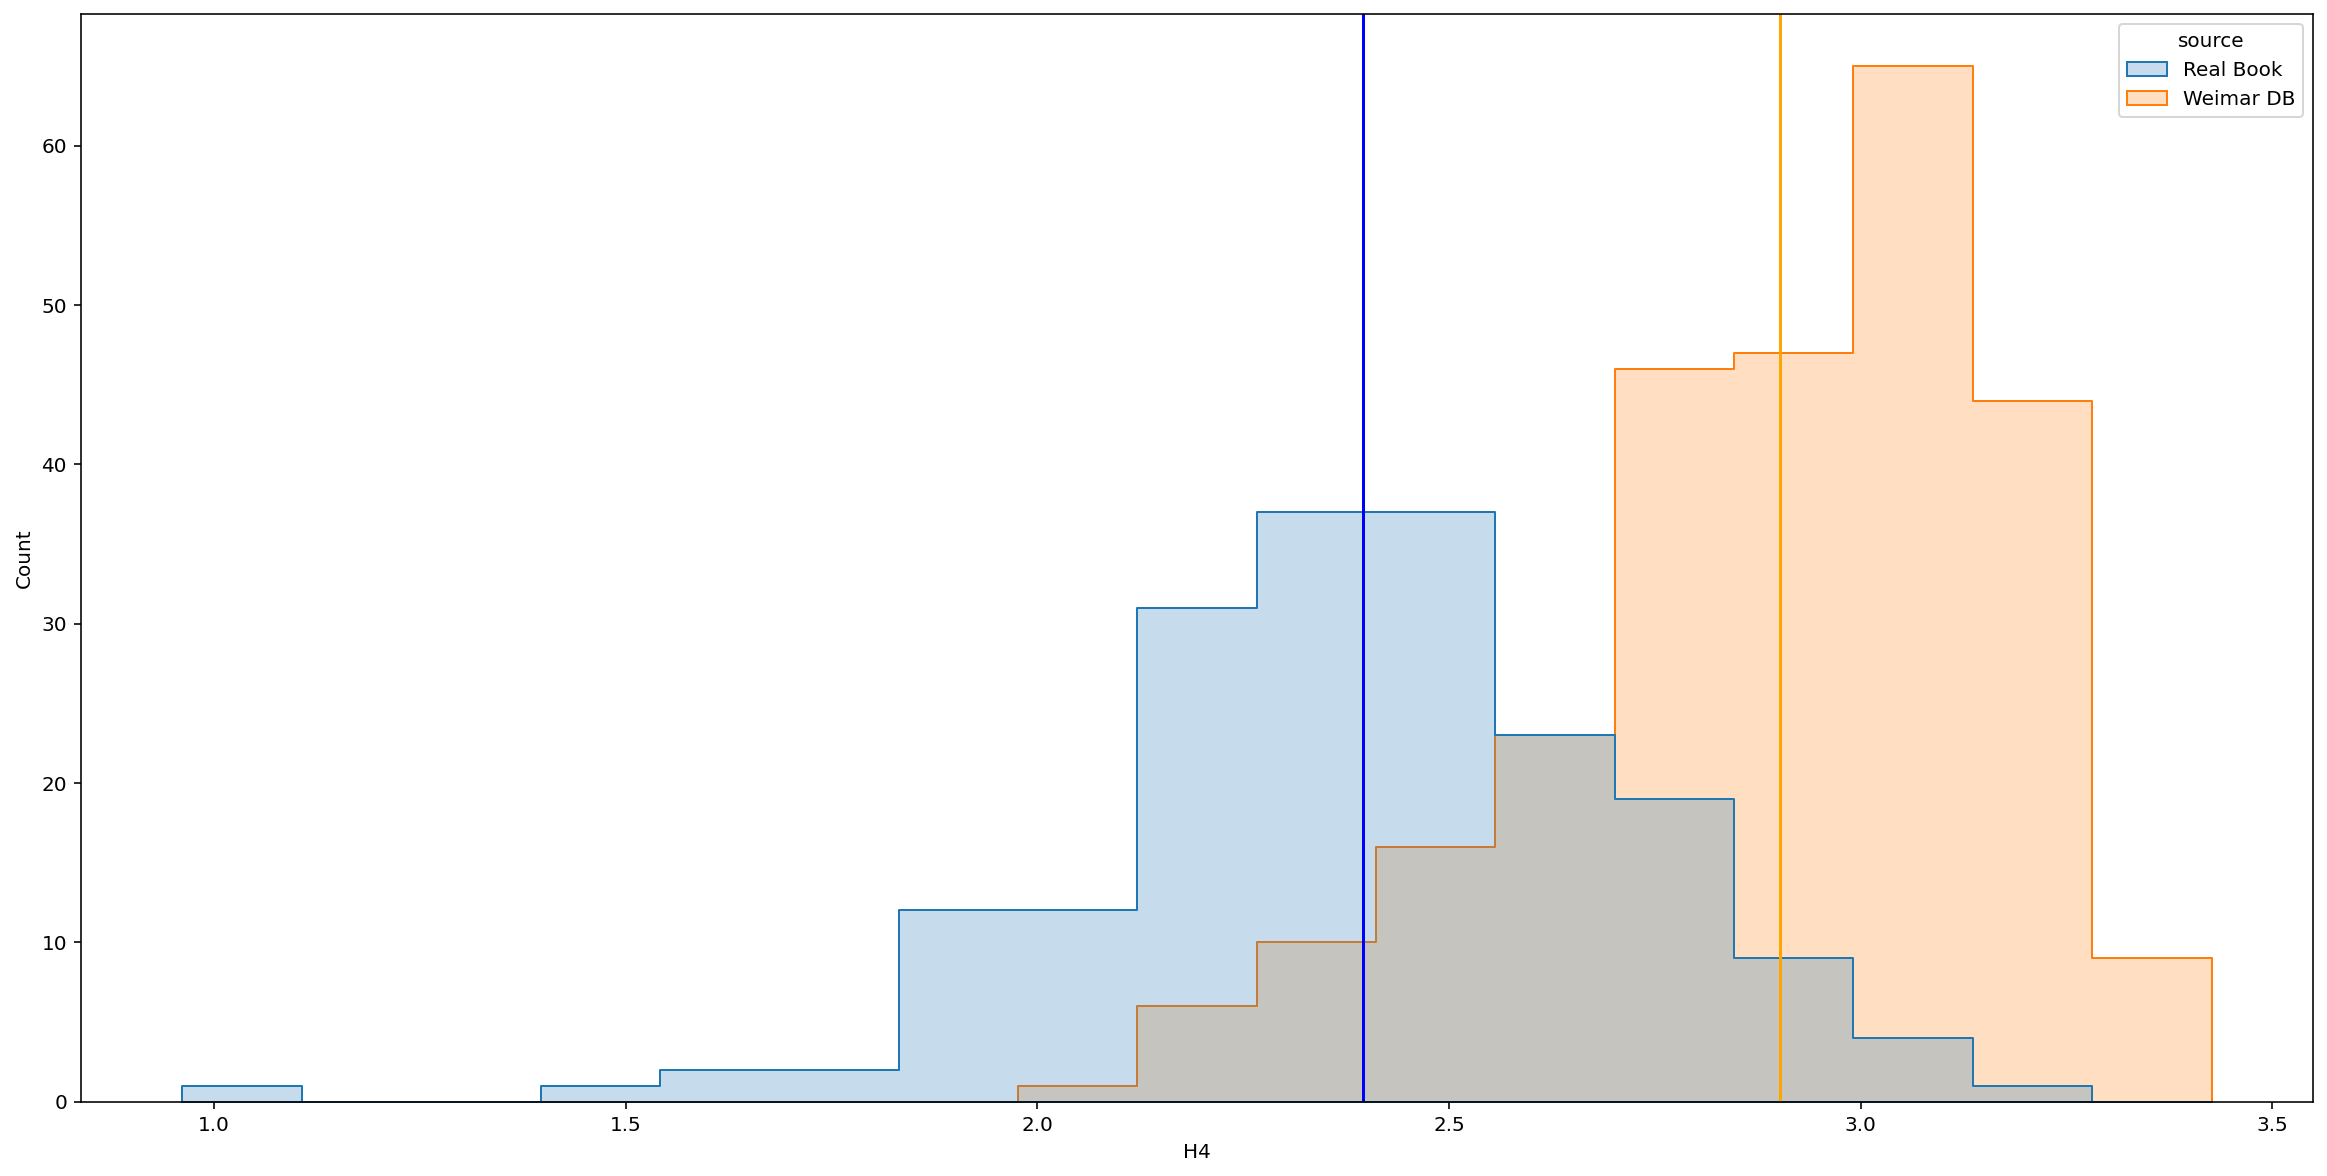

In [26]:
sns.histplot(data=m, x='H4', hue='source', element="step")
plt.axvline(x=m[m.source == 'Weimar DB'].H4.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].H4.mean(),
            color='blue')

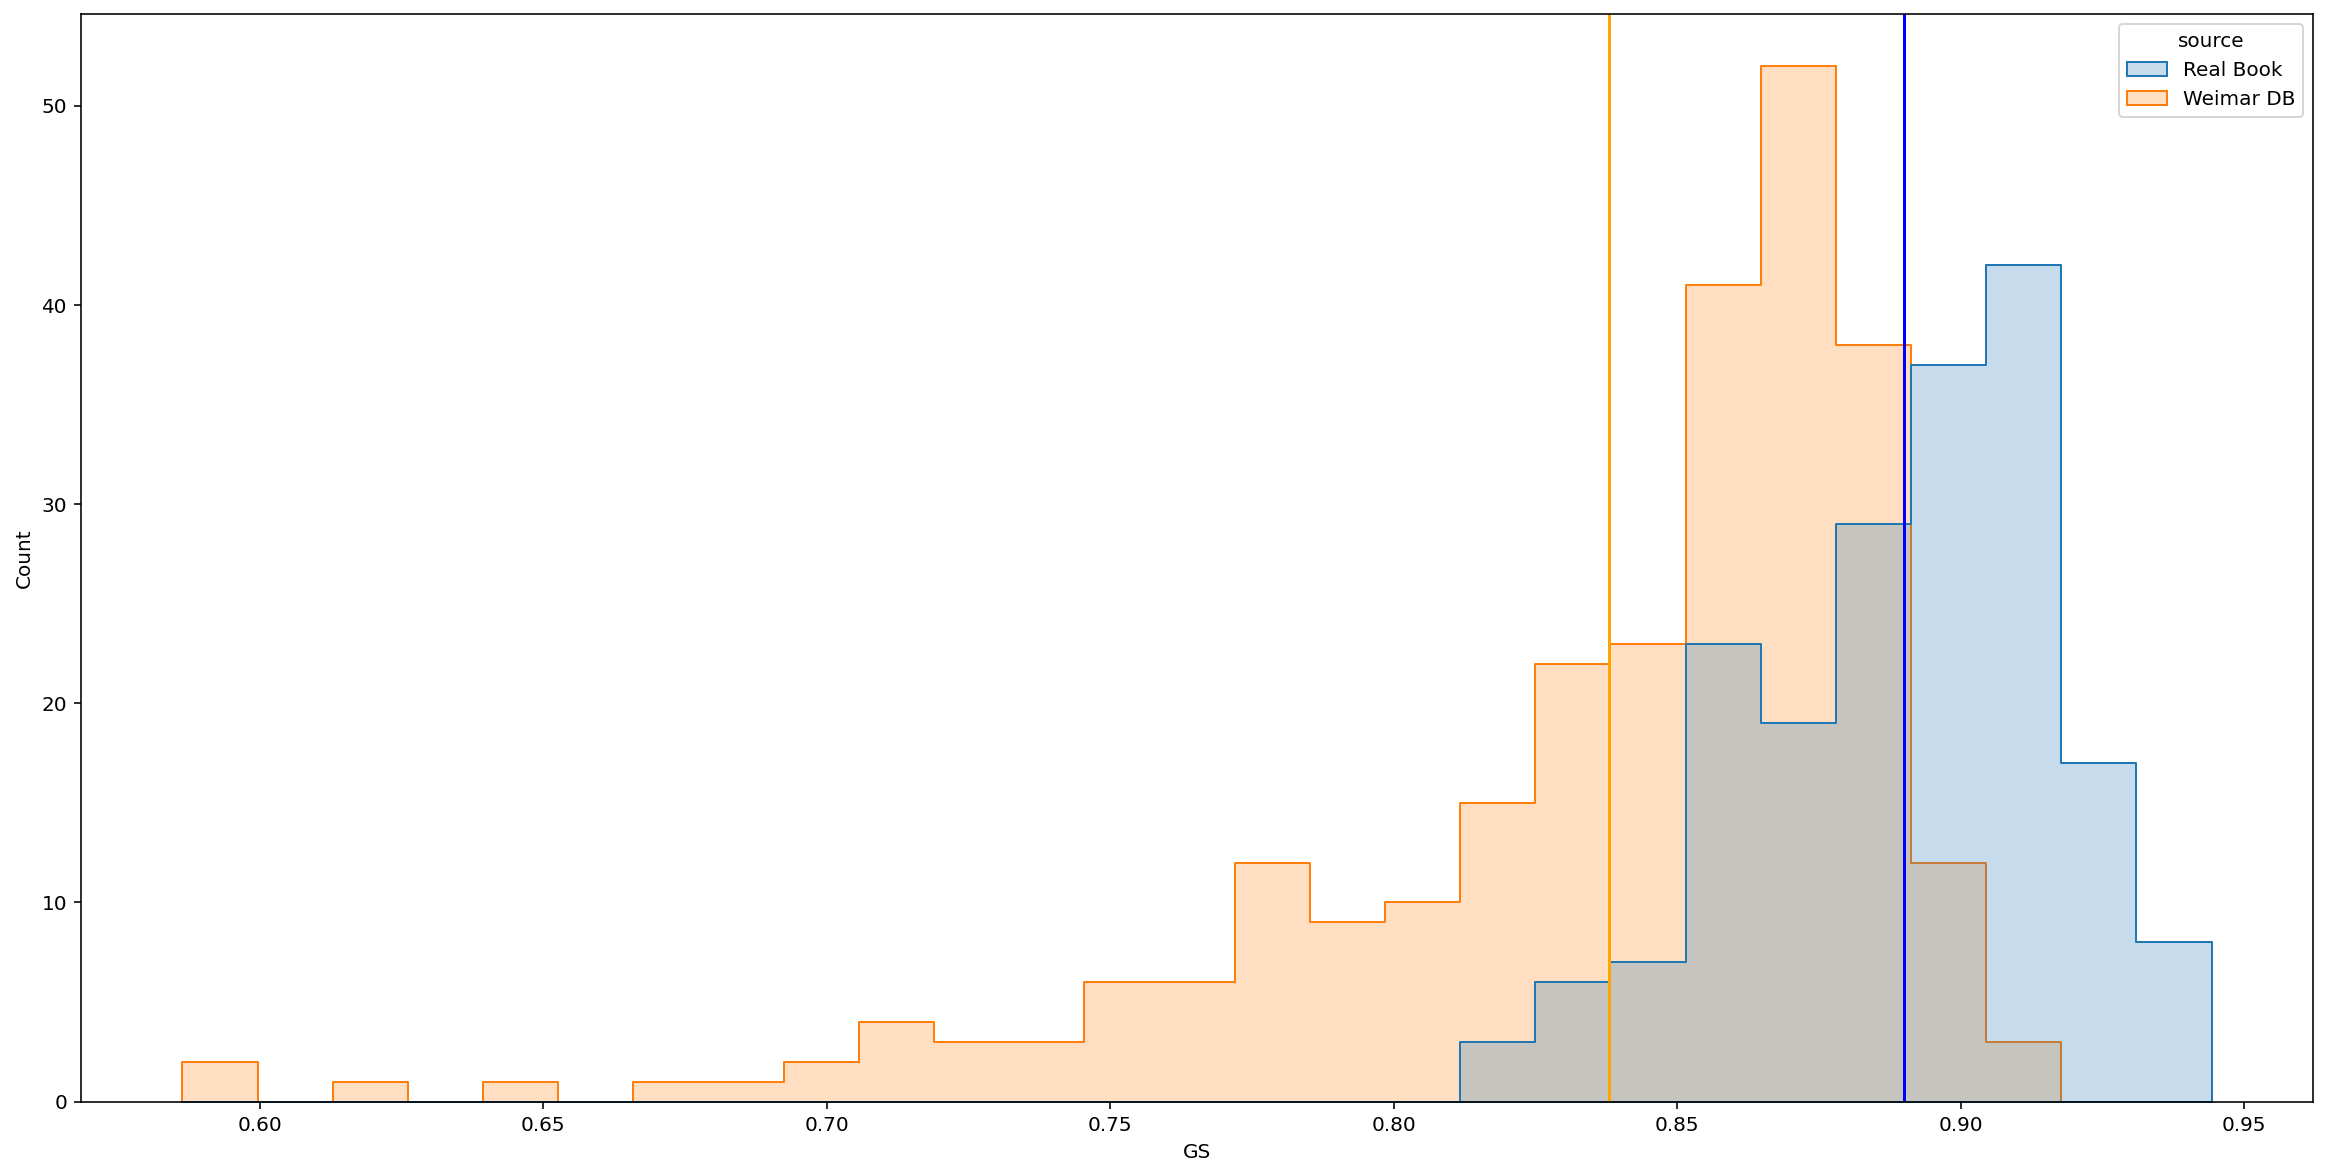

In [27]:
sns.histplot(data=m, x='GS', hue='source', element="step")
plt.axvline(x=m[m.source == 'Weimar DB'].GS.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].GS.mean(),
            color='blue')

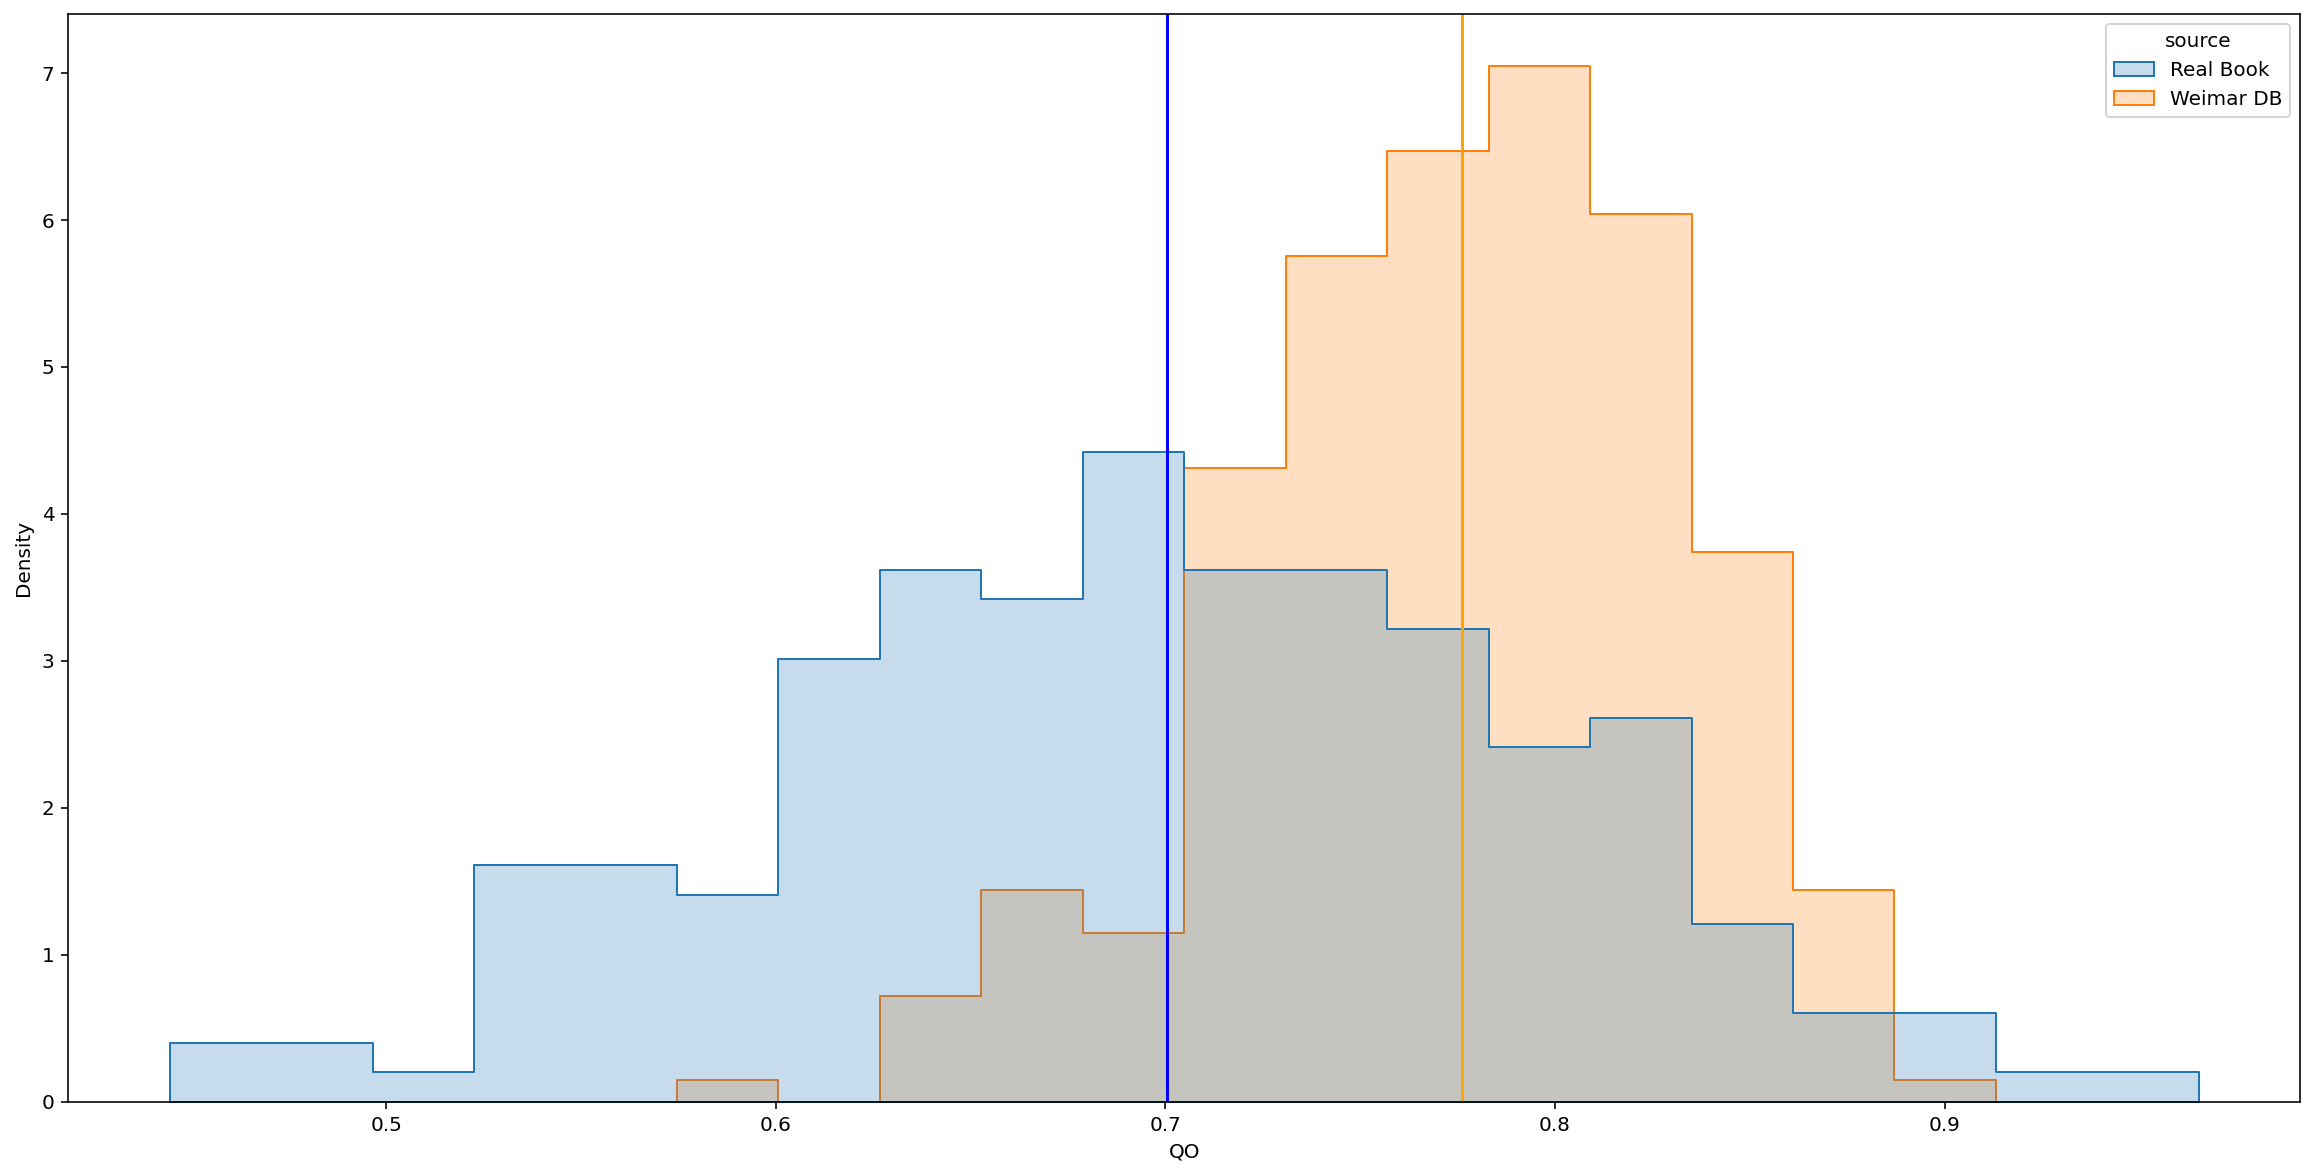

In [28]:
sns.histplot(data=m, x='QO', hue='source', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.source == 'Weimar DB'].QO.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].QO.mean(),
            color='blue')

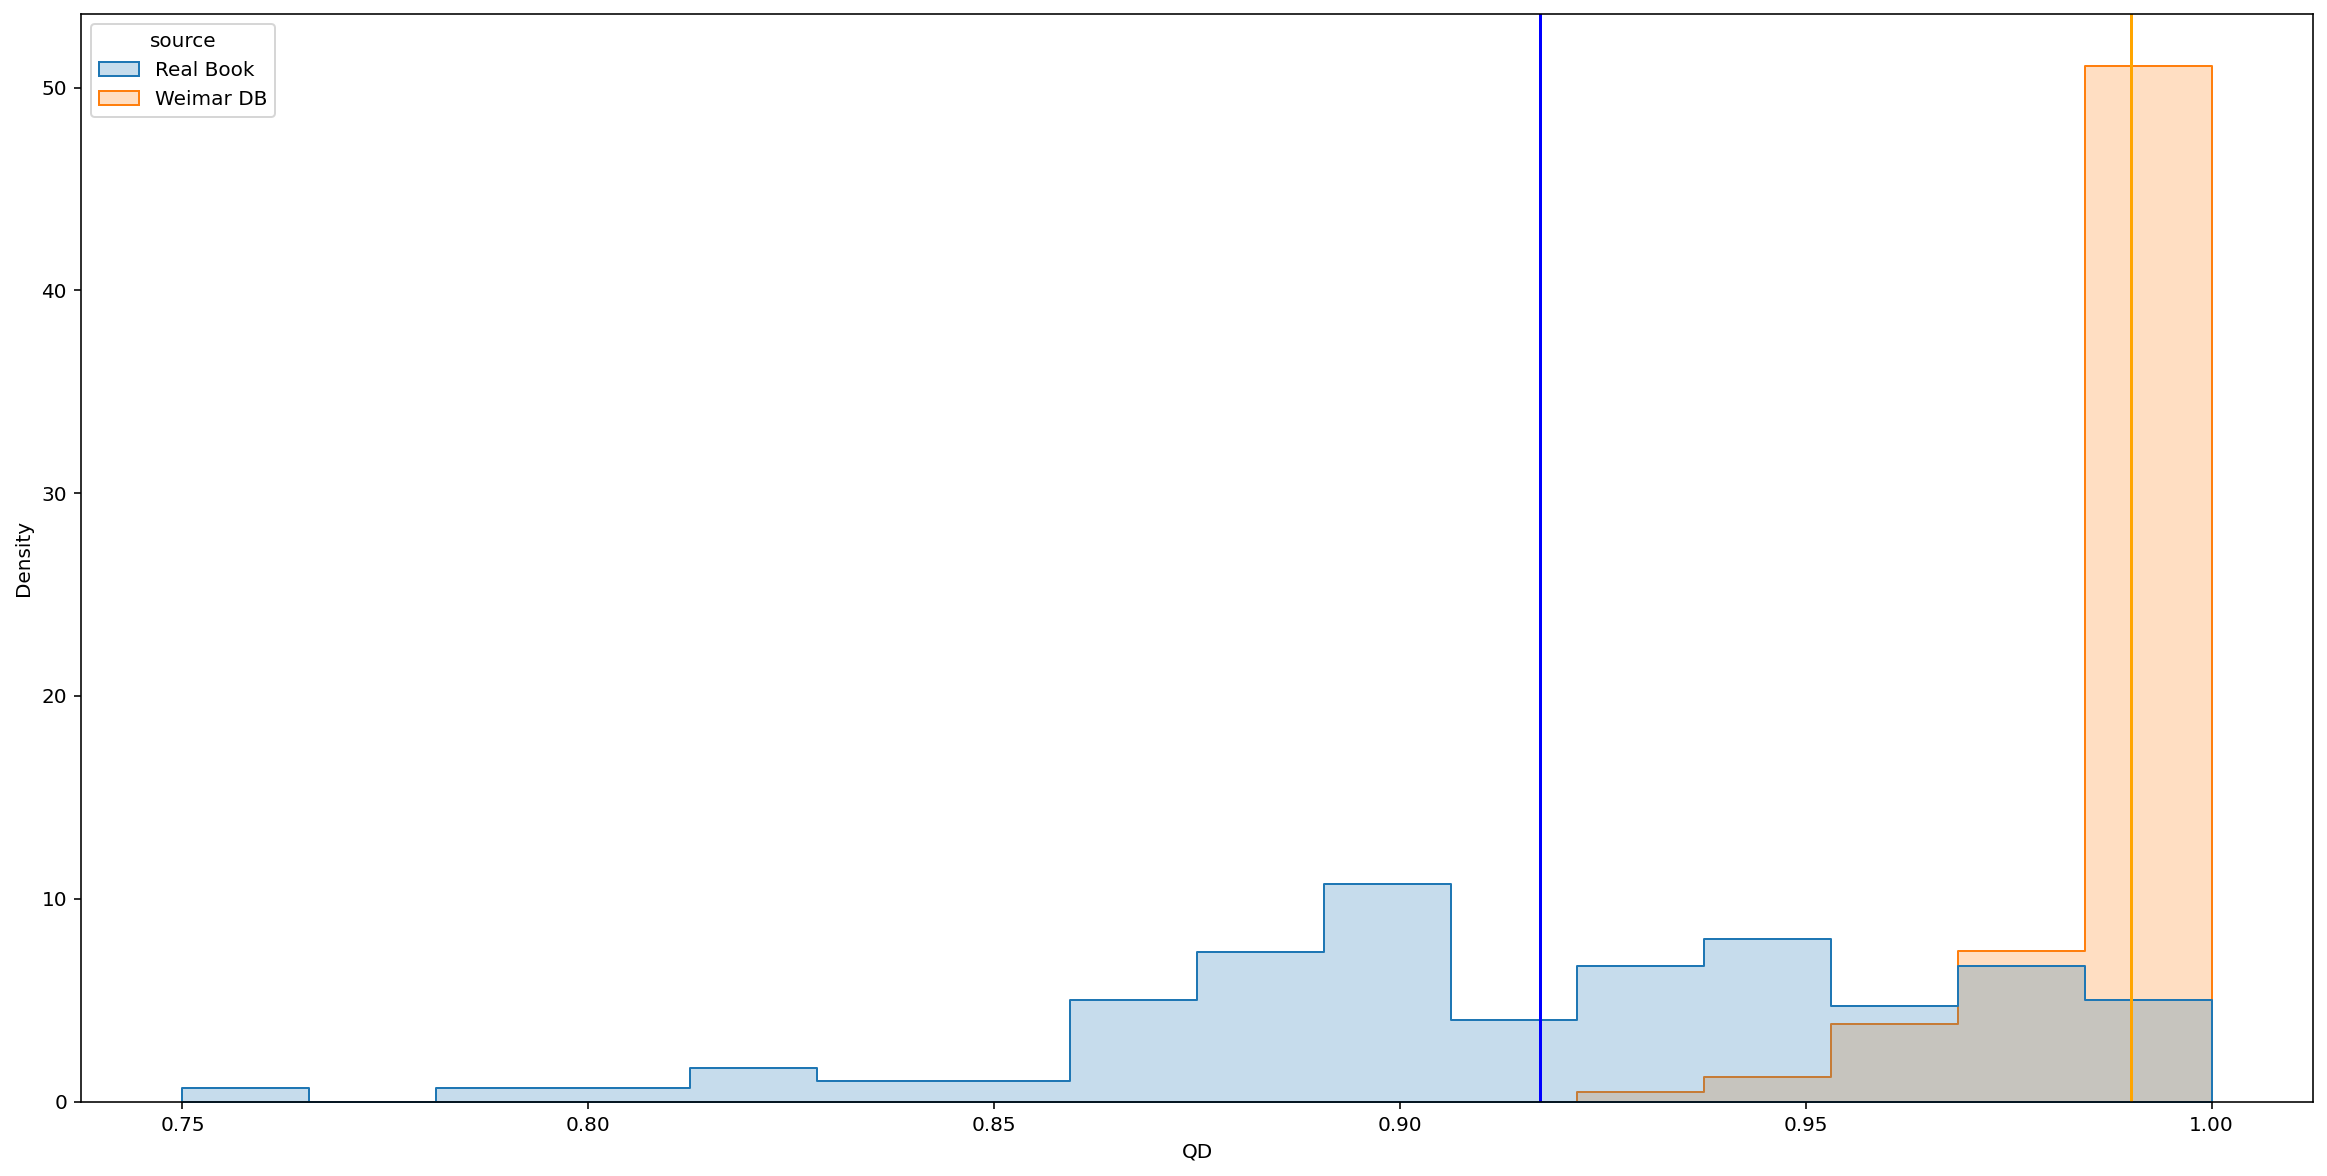

In [29]:
sns.histplot(data=m, x='QD', hue='source', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.source == 'Weimar DB'].QD.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].QD.mean(),
            color='blue')

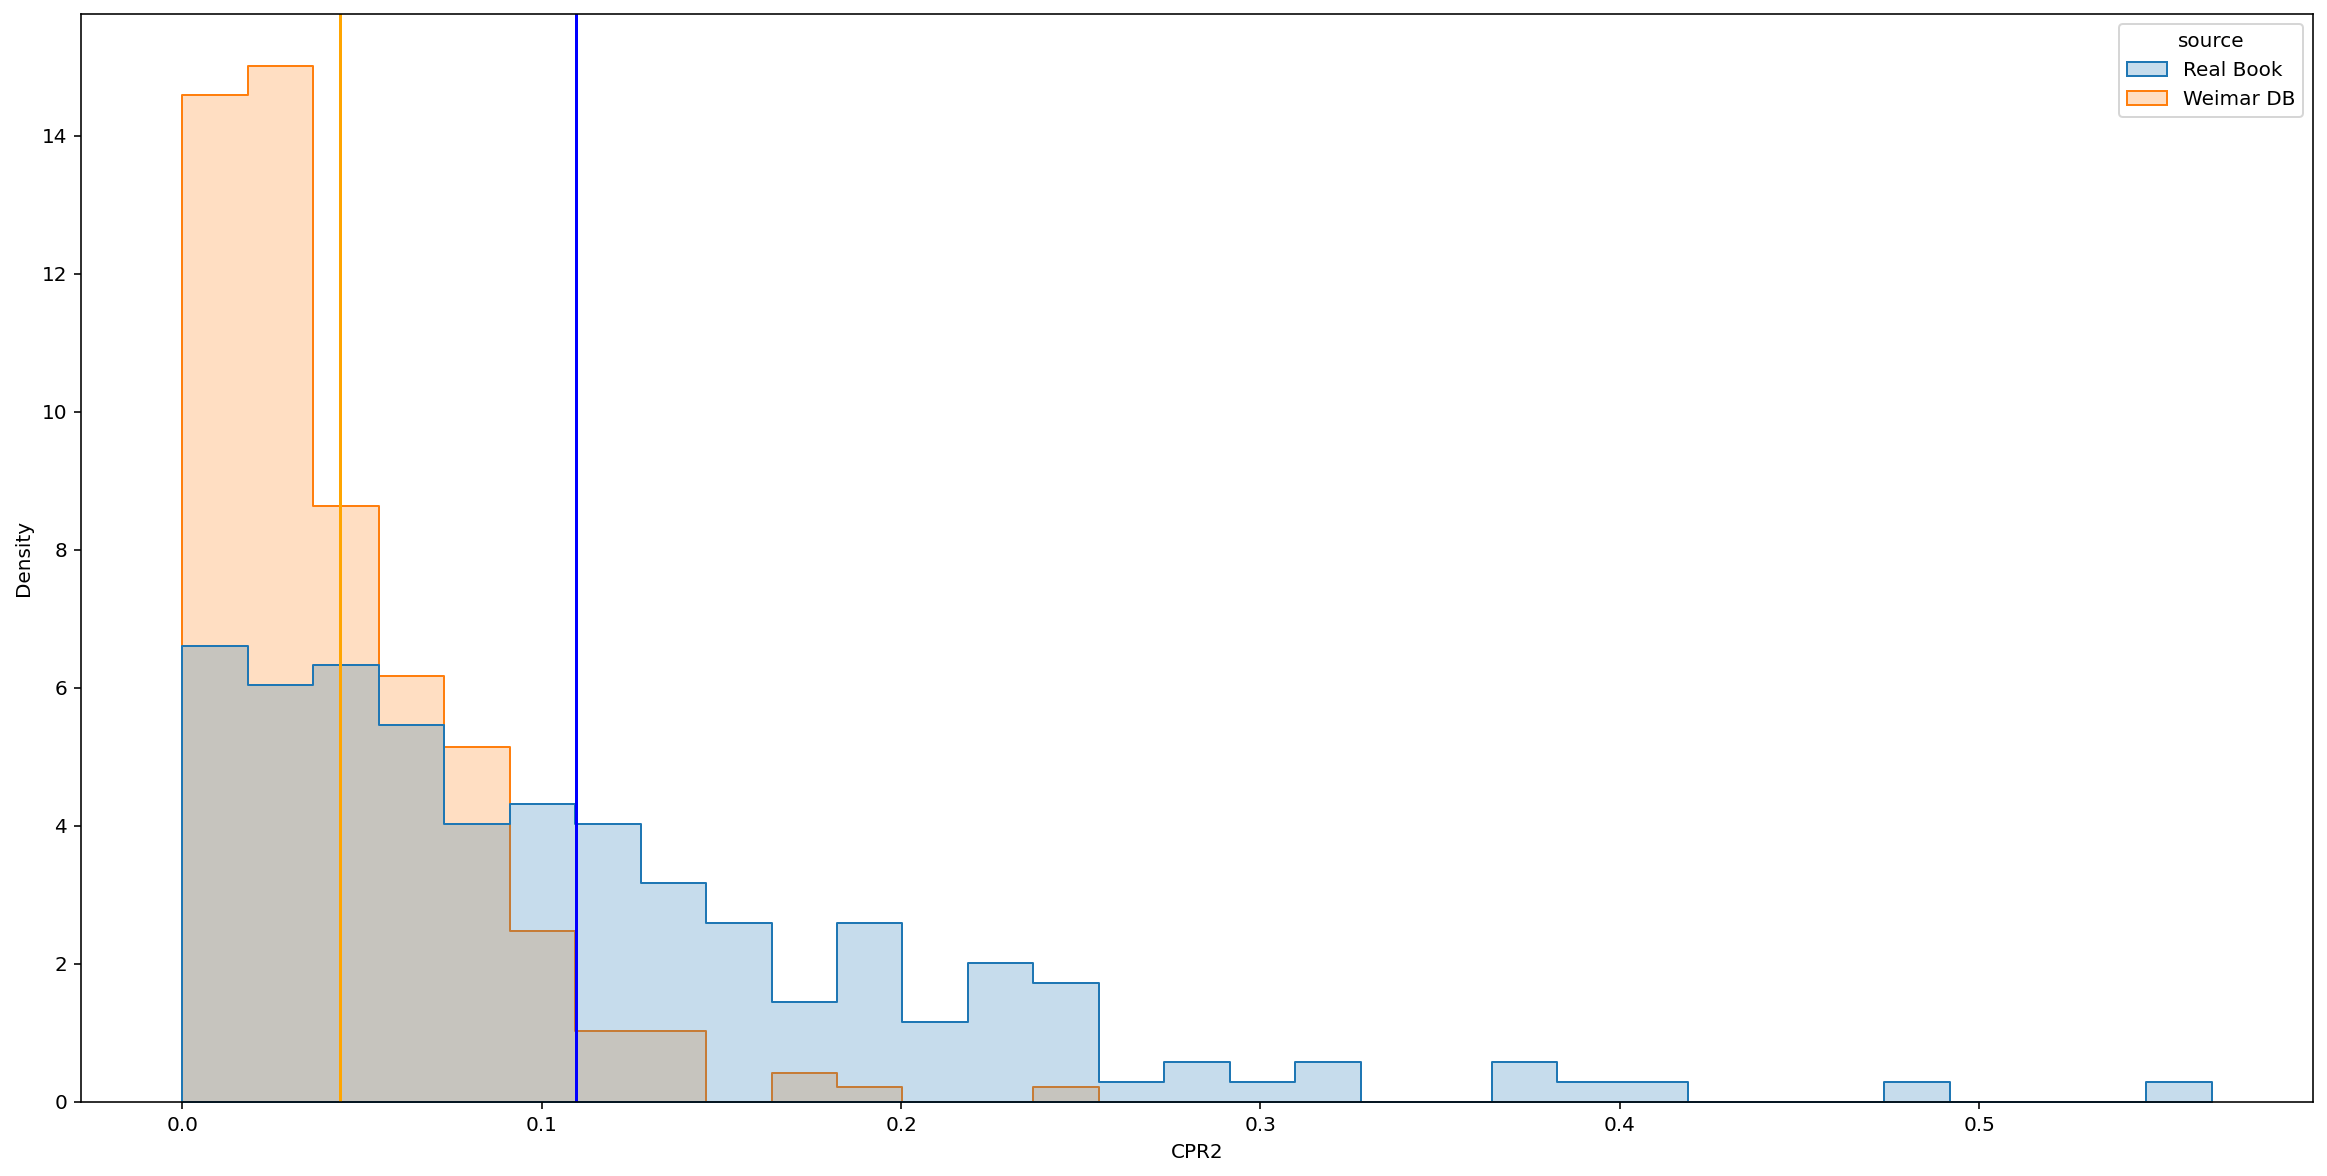

In [30]:
sns.histplot(data=m, x='CPR2', hue='source', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.source == 'Weimar DB'].CPR2.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].CPR2.mean(),
            color='blue')

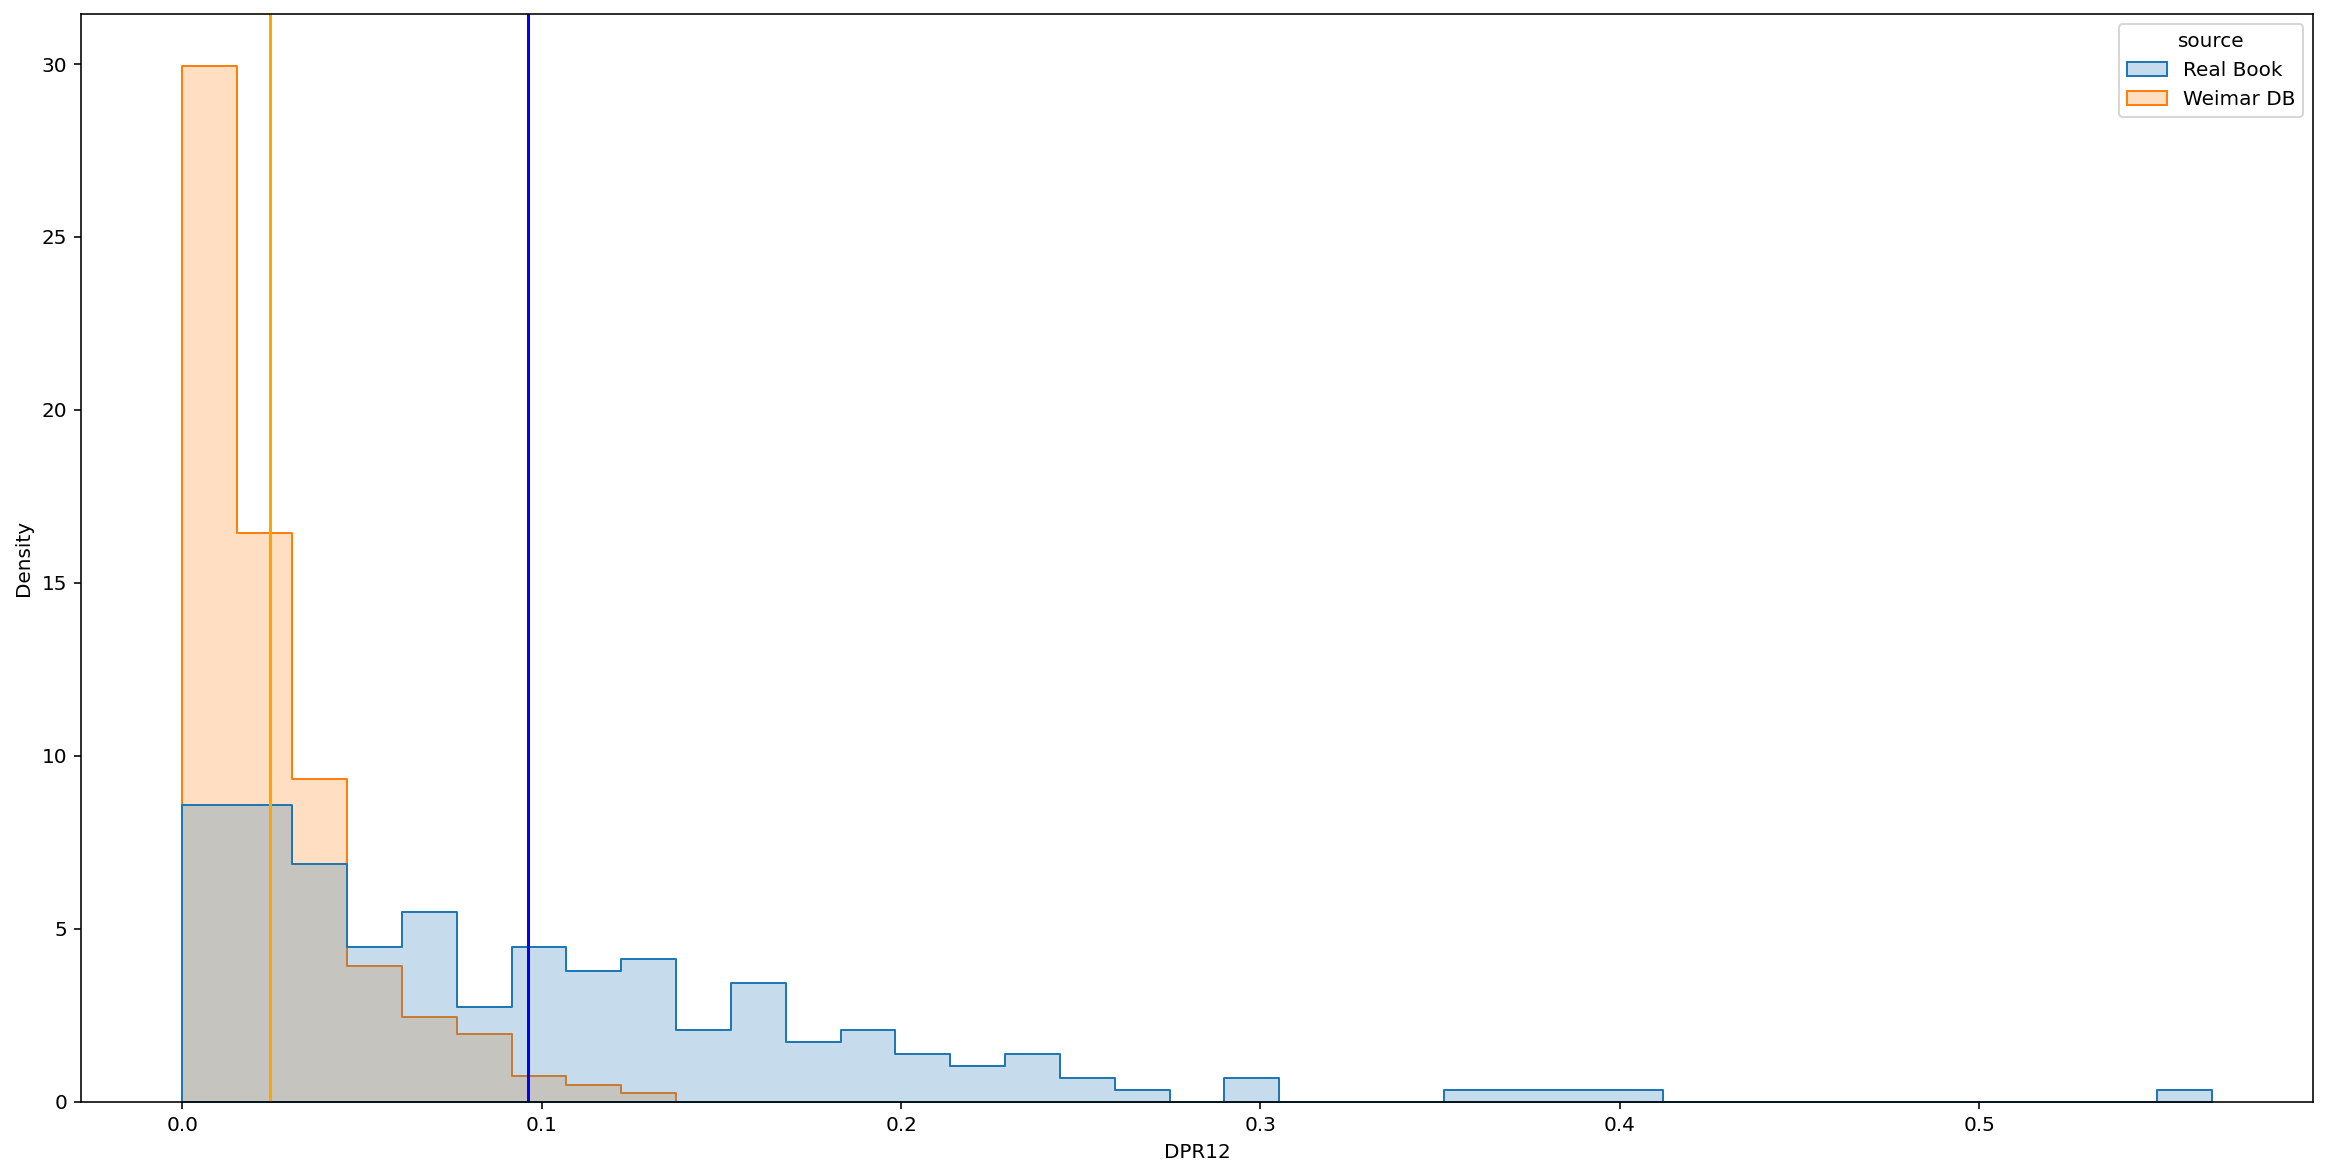

In [31]:
sns.histplot(data=m, x='DPR12', hue='source', element="step", 
             stat="density", common_norm=False)
plt.axvline(x=m[m.source == 'Weimar DB'].DPR12.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].DPR12.mean(),
            color='blue')

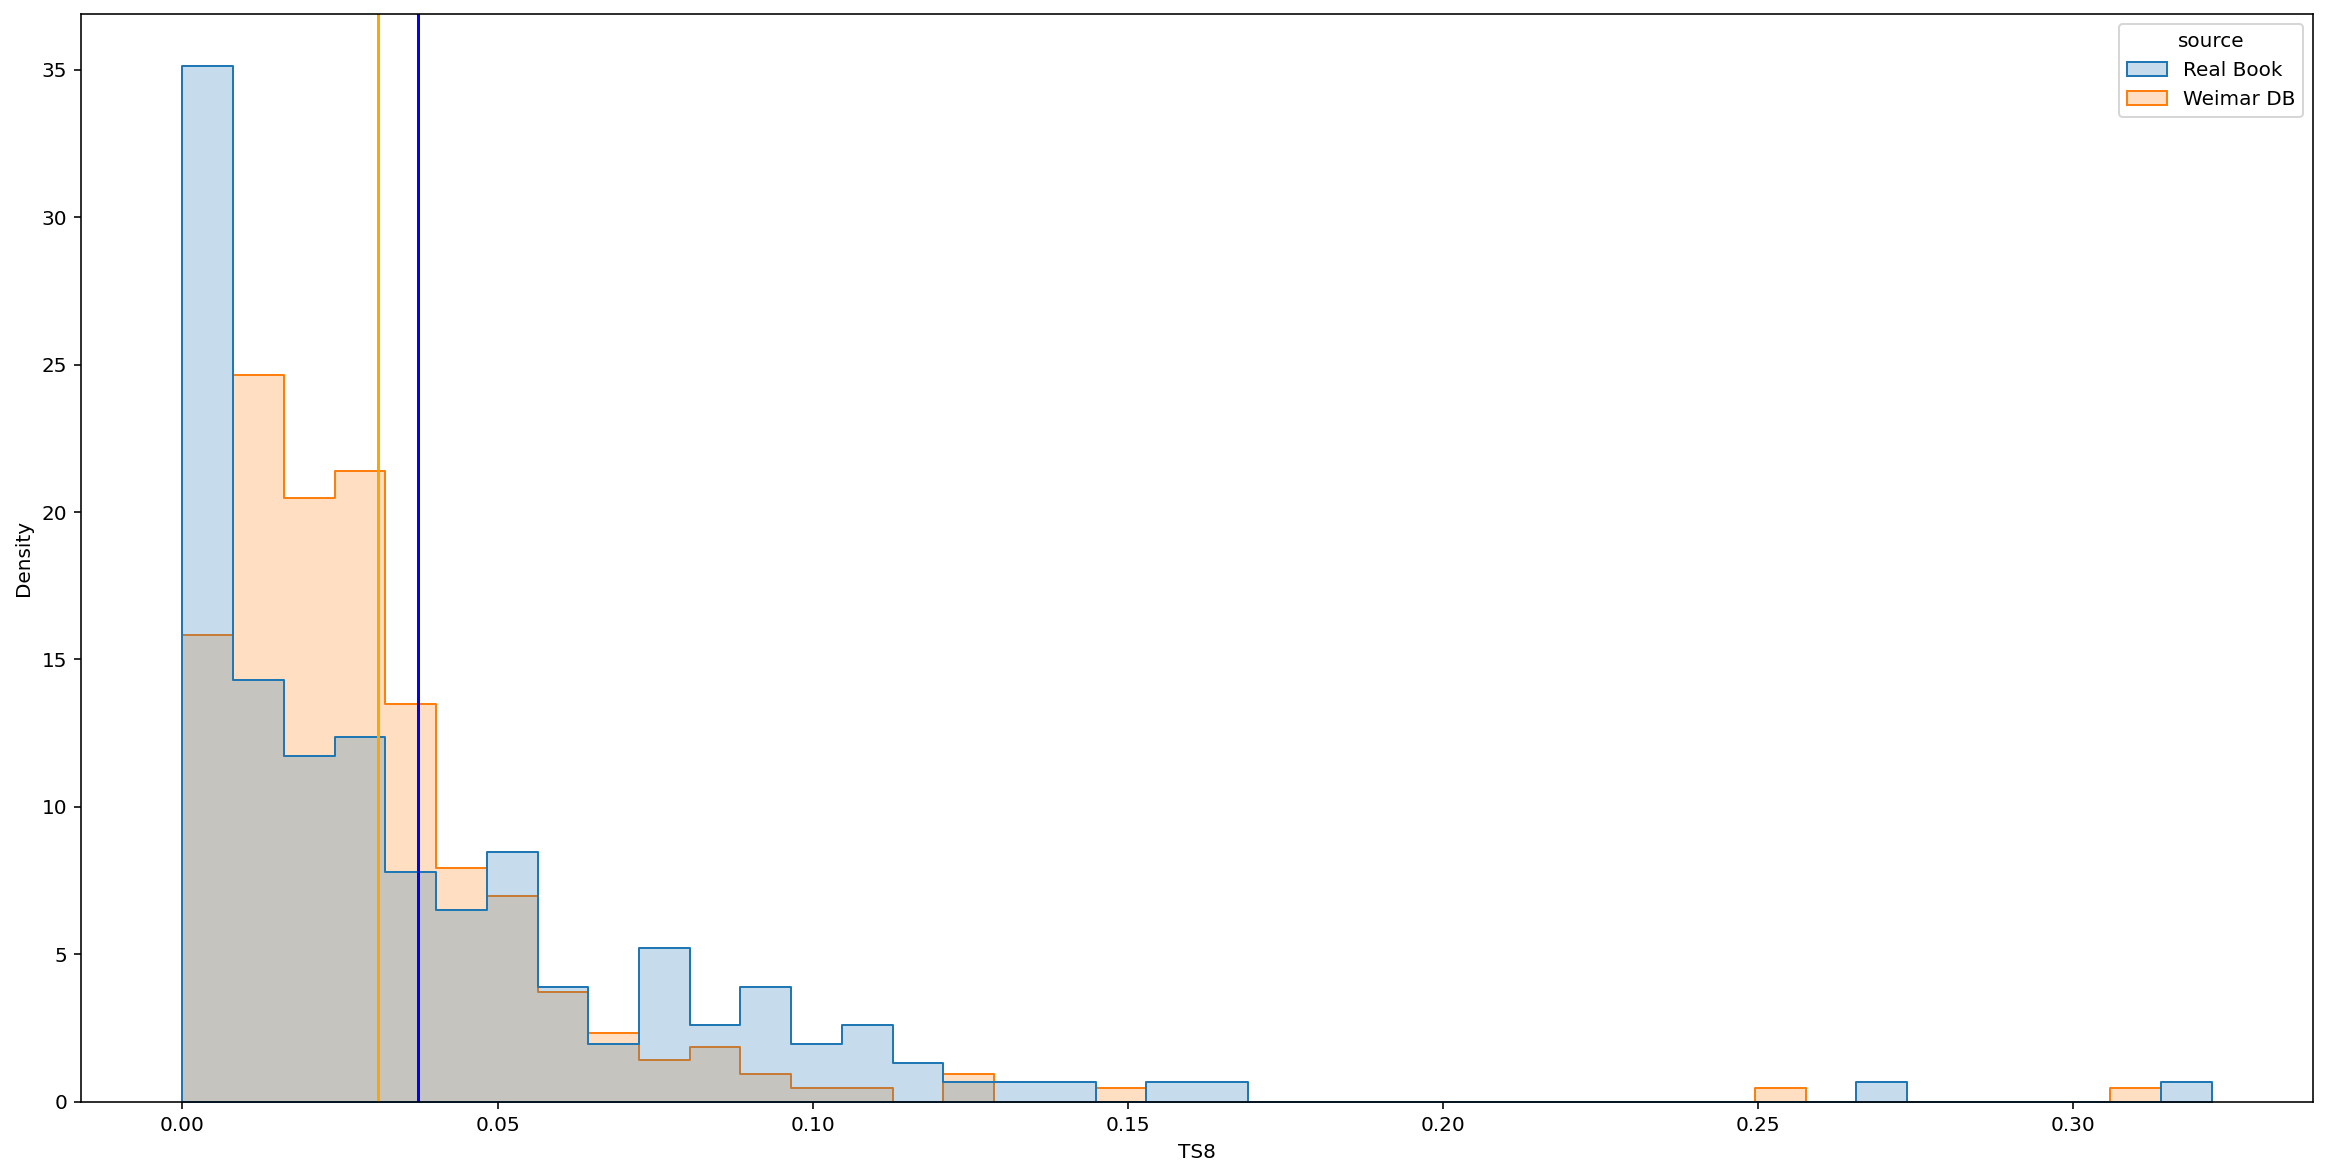

In [32]:
sns.histplot(data=m, x='TS8', hue='source', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.source == 'Weimar DB'].TS8.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].TS8.mean(),
            color='blue')

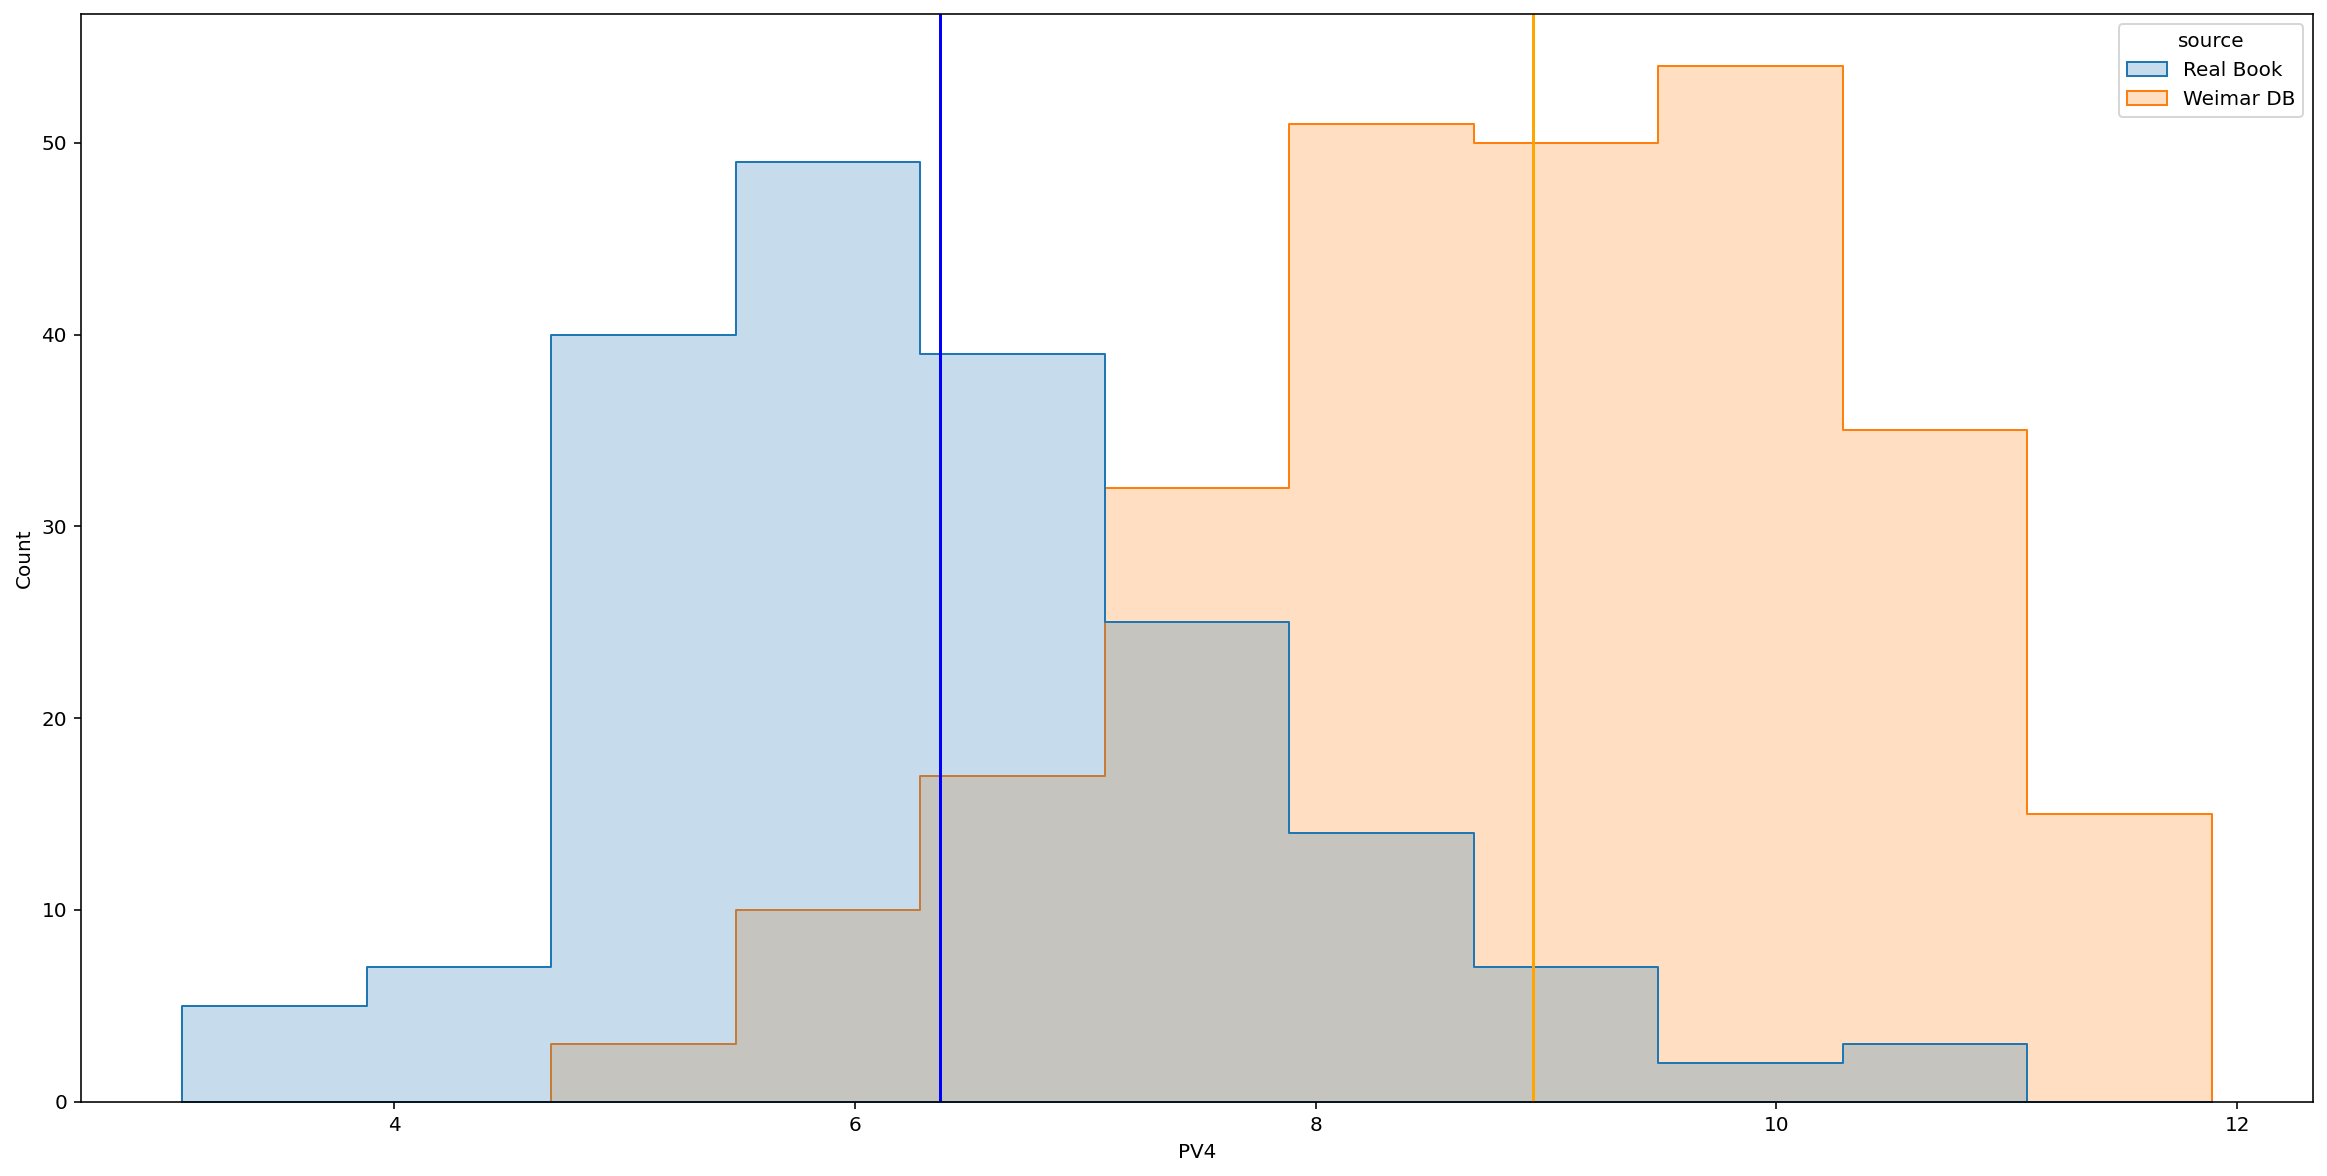

In [33]:
sns.histplot(data=m, x='PV4', hue='source', element="step")
plt.axvline(x=m[m.source == 'Weimar DB'].PV4.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].PV4.mean(),
            color='blue')

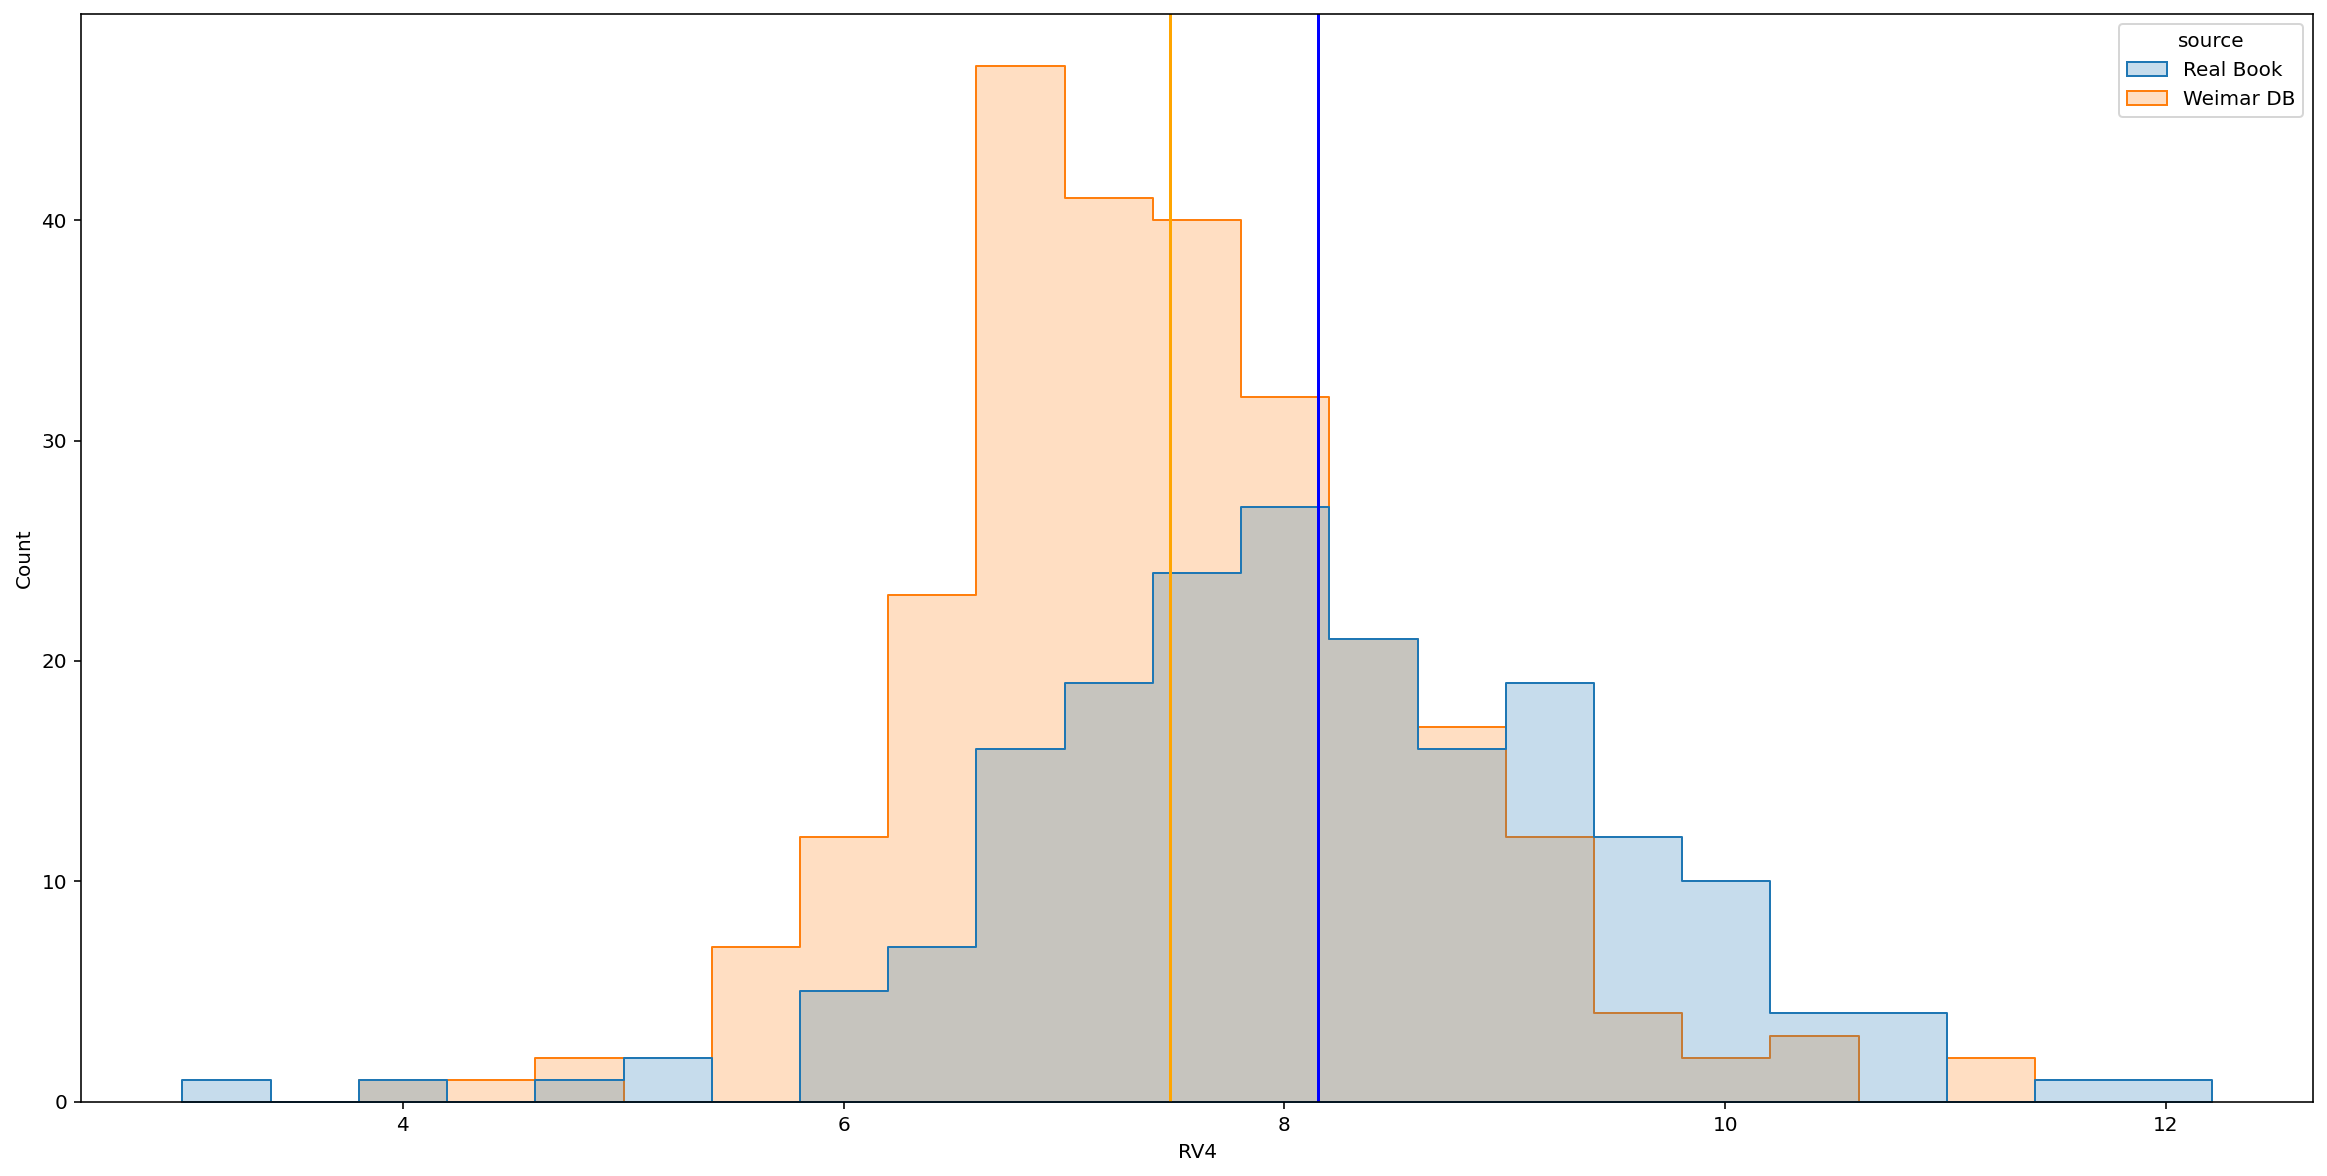

In [34]:
sns.histplot(data=m, x='RV4', hue='source', element="step")
plt.axvline(x=m[m.source == 'Weimar DB'].RV4.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].RV4.mean(),
            color='blue')

In [35]:
m['HCm'] = m.HC.apply(np.mean)

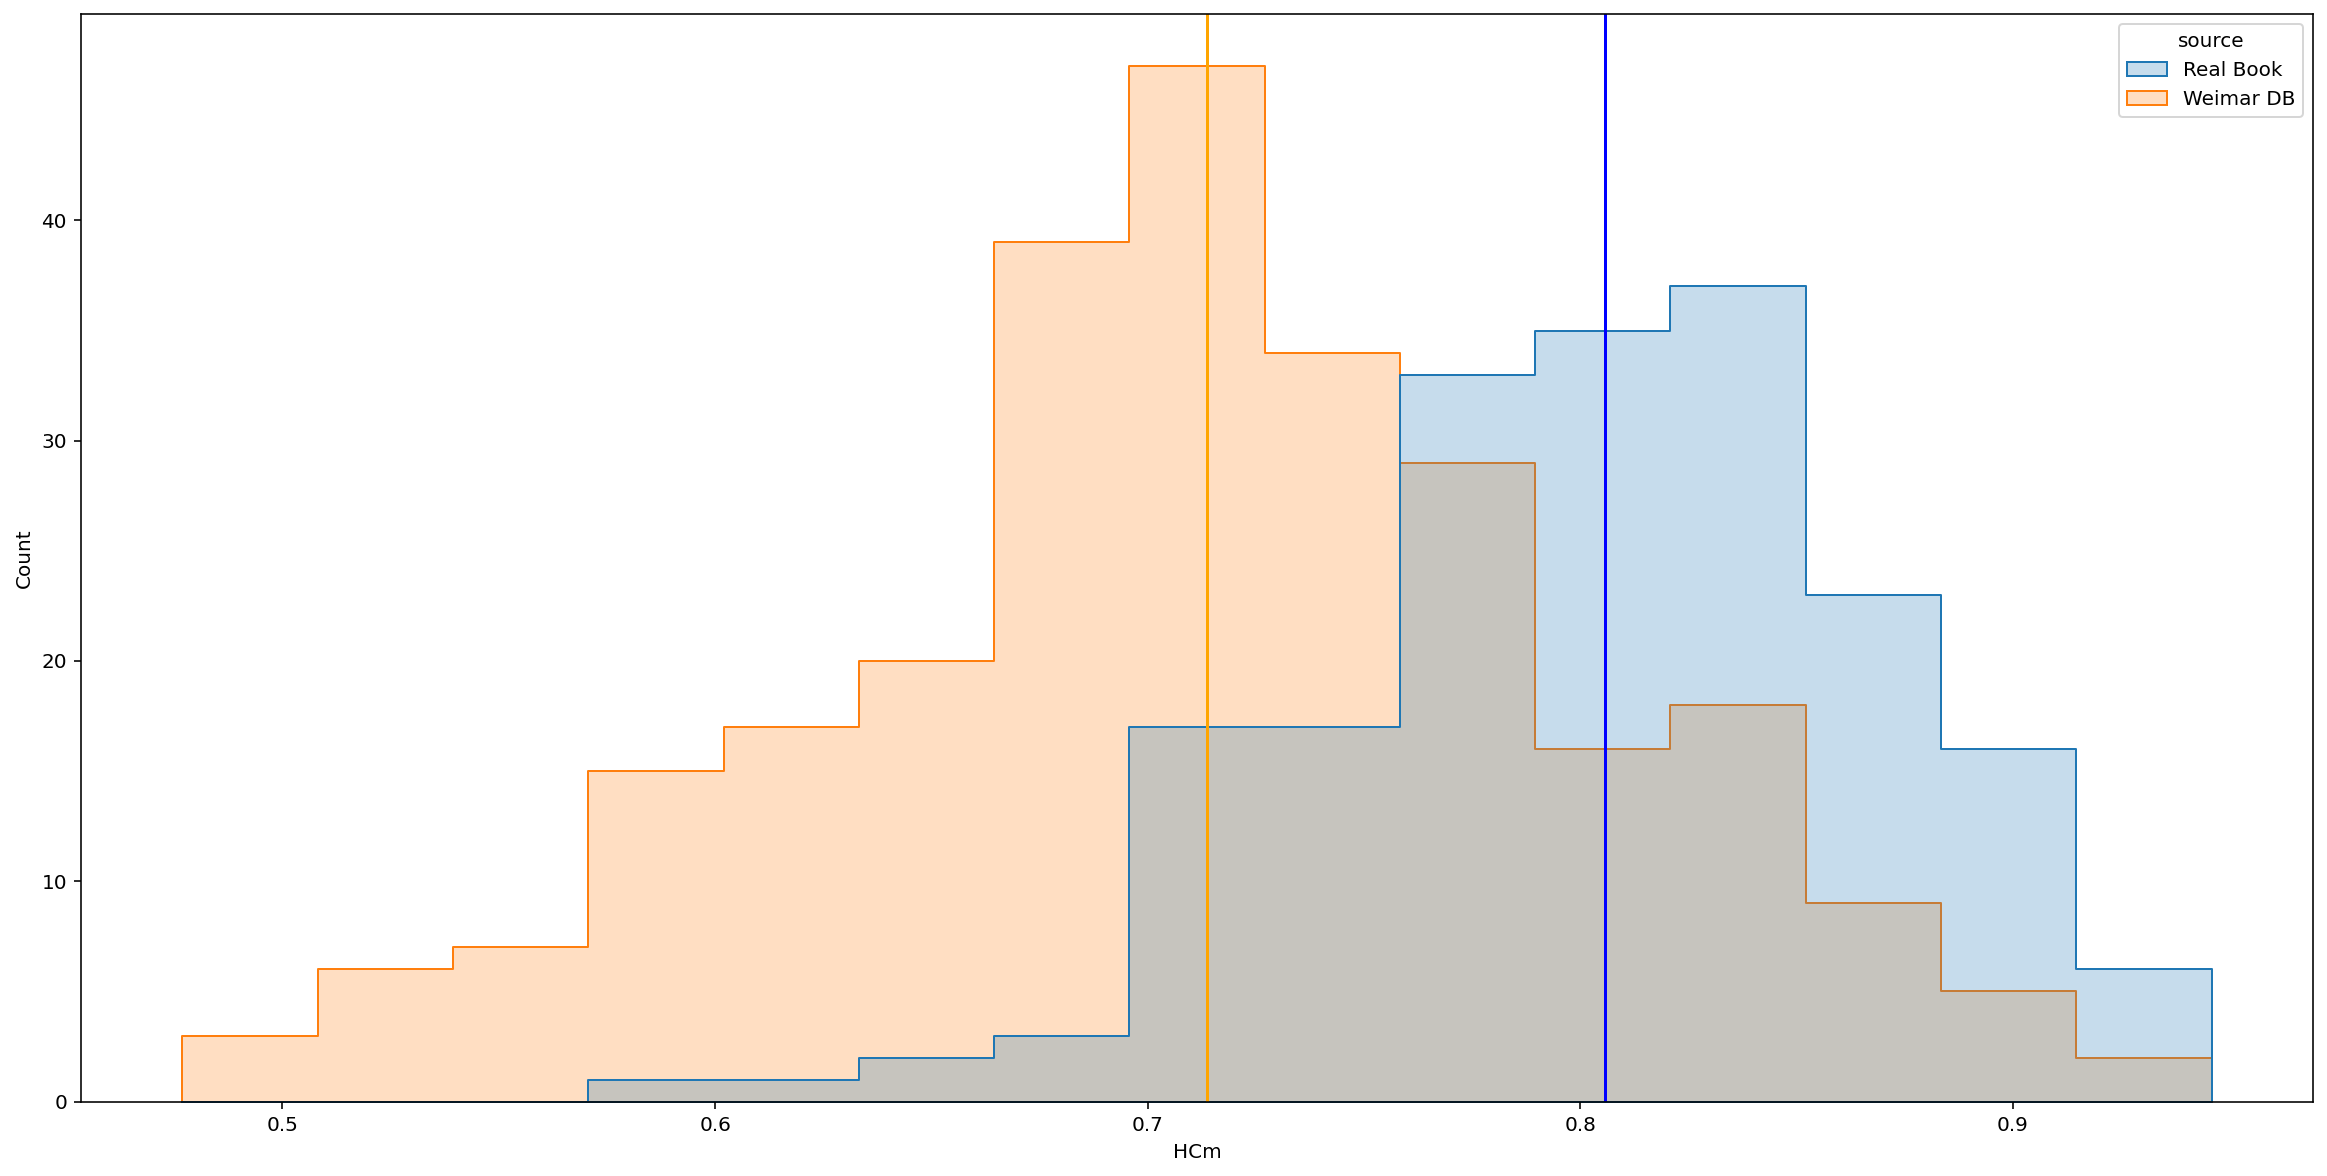

In [36]:
sns.histplot(data=m, x='HCm', hue='source', element="step")
plt.axvline(x=m[m.source == 'Weimar DB'].HCm.mean(),
            color='orange')
plt.axvline(x=m[m.source == 'Real Book'].HCm.mean(),
            color='blue')

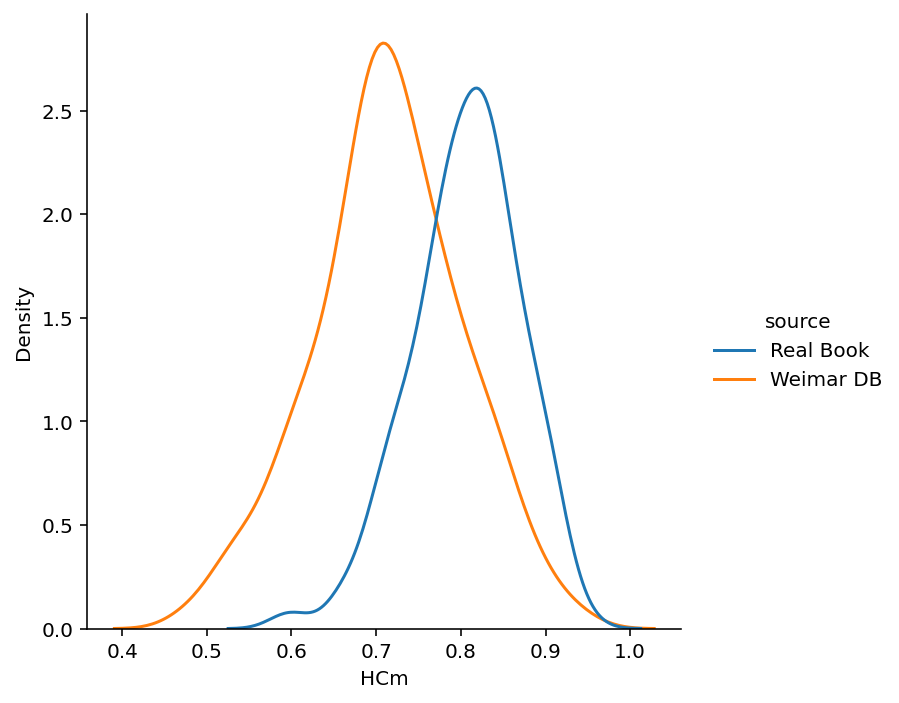

In [37]:
rcParams['figure.figsize'] = 200,100

sns.displot(data=m, x='HCm', kind='kde', hue='source')

In [38]:
def get_linear_cp(cp):

    linear_chord_progression = []

    for section in cp['sections']:
        linear_chord_progression += cp['progression'][section]
    
    return objective_metrics.compute_piece_chord_progression_irregularity(
        linear_chord_progression
    )


cp_irr = [{k: get_linear_cp(v)} for k,v in chord_progressions.items()]

In [39]:
all_cp_irr = [list(x.values())[0] for x in cp_irr]

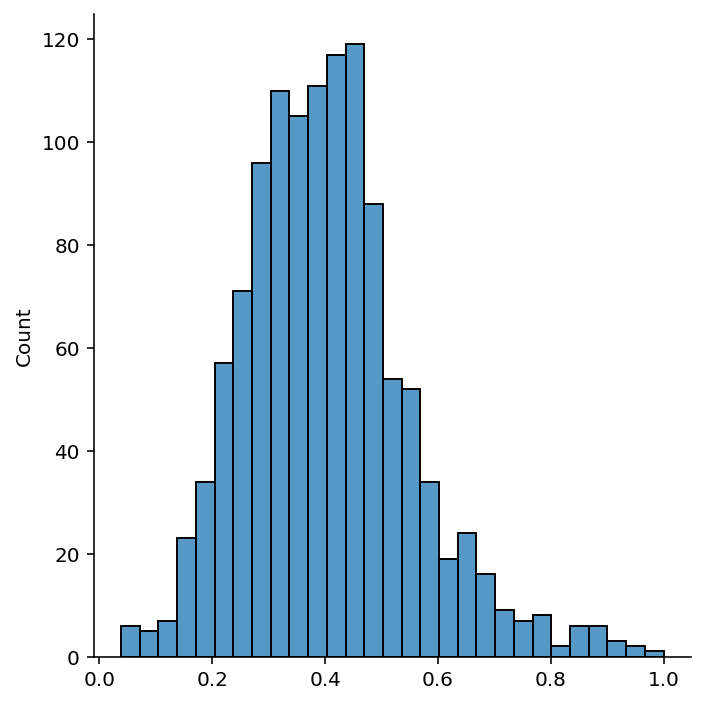

In [40]:
sns.displot(all_cp_irr)